In [1]:
import pandas as pd
import numpy as np

Importaremos los archivos resultantes del proceso de ETL

In [31]:
homicidios_hechos = pd.read_csv('homicidios_hechos.csv')
homicidios_victimas = pd.read_csv('homicidios_victimas.csv')

Analizaremos primero el dataset 'homicidios_hechos.csv'.

In [32]:
# Mustra las primeras líneas del dataset
homicidios_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,1,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,-58.465039,-34.680930,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS


In [33]:
# Muestra información de dataframe
homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    int64  
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    int64  
 4   MM                     696 non-null    int64  
 5   DD                     696 non-null    int64  
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  695 non-null    object 
 11  Cruce                  525 non-null    object 
 12  Dirección Normalizada  688 non-null    object 
 13  COMUNA                 696 non-null    int64  
 14  pos x                  684 non-null    float64
 15  pos y 

Podemos ver que el dataframe cuenta con 696 registros y 18 columnas, solo 5 de ellas tienen registros nulos, tomando en cuenta que durante el proceso de ETL se pudo observar registros con el valor SD (Sin Dato), vamos a sustituir el valor NaN por SD para luego contabilizarlos y tener números precisos sobre el total de datos faltantes.

In [34]:
# cambia los valores NaN por SD
homicidios_hechos = homicidios_hechos.fillna("SD")

Ya sin valores nulos procedemos a contar todos los valores SD.

In [35]:
# Contar valores 'SD' por columnas
conteo_sd_por_columna = homicidios_hechos.apply(lambda col: col[col == 'SD'].count())

# Mostrar el conteo
print(conteo_sd_por_columna)

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       1
HH                         1
LUGAR_DEL_HECHO            1
TIPO_DE_CALLE              0
Calle                      1
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
pos x                     12
pos y                     12
PARTICIPANTES              0
VICTIMA                    9
ACUSADO                   23
dtype: int64


La columna 'Cruce' para este analisis no la tomaremos en cuenta, en su lugar usaremos las coordenadas y la dirección normalizada

In [36]:
homicidios_hechos = homicidios_hechos.drop(['Cruce'], axis=1)

Con respecto a los valores SD de la columna 'VICTIMA' nuestro enfoque para imputar los valores faltantes será sustituir de manera equitativa y aleatoria con los 3 valores mas comunes de la columna.

In [37]:
# Obtener los 3 valores más comunes en la columna 'VICTIMA'
top_3_victimas = homicidios_hechos['VICTIMA'].value_counts().head(3).index

# Sustituir 'SD' en la columna 'VICTIMA' por los valores más comunes
homicidios_hechos.loc[homicidios_hechos['VICTIMA'] == 'SD', 'VICTIMA'] = np.random.choice(top_3_victimas, size=np.sum(homicidios_hechos['VICTIMA'] == 'SD'))

Aplicaremos el mismo enfoque para la los valores SD de la columna 'ACUSADO'

In [38]:
# Obtenemos los 3 valores más comunes en la columna 'ACUSADO'
top_3_acusados = homicidios_hechos['ACUSADO'].value_counts().head(3).index

# Sustituye 'SD' en la columna 'ACUSADO' por los valores más comunes
homicidios_hechos.loc[homicidios_hechos['ACUSADO'] == 'SD', 'ACUSADO'] = np.random.choice(top_3_acusados, size=np.sum(homicidios_hechos['ACUSADO'] == 'SD'))

Volvemos a contar los valores SD para verificar que las columnas 'VICTIMA' y 'ACUSADO' ya no tienen registros SD

In [39]:
# Contar valores 'SD' por columnas
conteo_sd_por_columna = homicidios_hechos.apply(lambda col: col[col == 'SD'].count())

# Mostrar el conteo
print(conteo_sd_por_columna)

ID                        0
N_VICTIMAS                0
FECHA                     0
AAAA                      0
MM                        0
DD                        0
HORA                      1
HH                        1
LUGAR_DEL_HECHO           1
TIPO_DE_CALLE             0
Calle                     1
Dirección Normalizada     8
COMUNA                    0
pos x                    12
pos y                    12
PARTICIPANTES             0
VICTIMA                   0
ACUSADO                   0
dtype: int64


El siguiente código va a mostrar el porcentaje de valores faltantes por columna

In [40]:
# Calcula el porcentaje de "SD" por columna
porcentaje_sd_por_columna = round((homicidios_hechos == "SD").mean() * 100, 1)

# Crea un DataFrame con los resultados
porcentaje_sd_dataframe = pd.DataFrame({
    'Columna': porcentaje_sd_por_columna.index,
    'Porcentaje_SD': porcentaje_sd_por_columna.values
})

# Muestra el DataFrame con los porcentajes de "SD"
print(porcentaje_sd_dataframe)


                  Columna  Porcentaje_SD
0                      ID            0.0
1              N_VICTIMAS            0.0
2                   FECHA            0.0
3                    AAAA            0.0
4                      MM            0.0
5                      DD            0.0
6                    HORA            0.1
7                      HH            0.1
8         LUGAR_DEL_HECHO            0.1
9           TIPO_DE_CALLE            0.0
10                  Calle            0.1
11  Dirección Normalizada            1.1
12                 COMUNA            0.0
13                  pos x            1.7
14                  pos y            1.7
15          PARTICIPANTES            0.0
16                VICTIMA            0.0
17                ACUSADO            0.0


Ahora vamos a mostrar el dataset homicidios_victimas.

In [41]:
homicidios_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,2016-01-10 00:00:00
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


Mostraremos información de homicidios_victimas

In [42]:
homicidios_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_hecho             717 non-null    object
 1   FECHA                717 non-null    object
 2   AAAA                 717 non-null    int64 
 3   MM                   717 non-null    int64 
 4   DD                   717 non-null    int64 
 5   ROL                  717 non-null    object
 6   VICTIMA              717 non-null    object
 7   SEXO                 717 non-null    object
 8   EDAD                 717 non-null    int64 
 9   FECHA_FALLECIMIENTO  717 non-null    object
dtypes: int64(4), object(6)
memory usage: 56.1+ KB


No hay valores nulos, pero así como en homicidios_hechos hay valores faltantes 'SD' vamos a proceder a contarlos

In [43]:
# Contar valores 'SD' por columnas
conteo_sd_por_columna = homicidios_victimas.apply(lambda col: col[col == 'SD'].count())

# Mostrar el conteo
print(conteo_sd_por_columna)

ID_hecho                0
FECHA                   0
AAAA                    0
MM                      0
DD                      0
ROL                    11
VICTIMA                 9
SEXO                    6
EDAD                    0
FECHA_FALLECIMIENTO     0
dtype: int64


Vamos a mostrar el procentaje de nulos por columna

In [44]:
# Calcula el porcentaje de "SD" por columna
porcentaje_sd_por_columna = round((homicidios_victimas == "SD").mean() * 100, 1)

# Crea un DataFrame con los resultados
porcentaje_sd_dataframe = pd.DataFrame({
    'Columna': porcentaje_sd_por_columna.index,
    'Porcentaje_SD': porcentaje_sd_por_columna.values
})

# Muestra el DataFrame con los porcentajes de "SD"
print(porcentaje_sd_dataframe)

               Columna  Porcentaje_SD
0             ID_hecho            0.0
1                FECHA            0.0
2                 AAAA            0.0
3                   MM            0.0
4                   DD            0.0
5                  ROL            1.5
6              VICTIMA            1.3
7                 SEXO            0.8
8                 EDAD            0.0
9  FECHA_FALLECIMIENTO            0.0


Solamente tenemos 6 valores falantes en la columna 'SEXO, le asignaremos 3 valores para 'MASCULINO' y 3 valores para 'FEMENINO'

In [45]:
# Contamos la cantidad de 'SD' en la columna 'SEXO'
cantidad_sd = (homicidios_victimas['SEXO'] == 'SD').sum()

# Obtener índices de las filas con 'SD' en la columna 'SEXO'
indices_sd = homicidios_victimas[homicidios_victimas['SEXO'] == 'SD'].index

# Asignar 3 valores 'MASCULINO' y 3 valores 'FEMENINO' a los campos 'SD' de manera alternada
valores_asignados = np.concatenate([['MASCULINO', 'FEMENINO'] * (cantidad_sd // 2), ['MASCULINO'][:cantidad_sd % 2]])

# Sustituir los valores 'SD' en la columna 'SEXO' con los valores asignados
homicidios_victimas.loc[indices_sd, 'SEXO'] = valores_asignados

Al momento de realizar el ETL la columna 'EDAD' tenia valores SD, para transformar esa columna a un tipo de datos int esos valores se convitieron en Nan, los mismos fueros sustituidos por -1, procederemos a ssutituir los valores -1 por la media aritmetica

In [46]:
# Calcular la media aritmética de la columna 'EDAD' excluyendo los valores -1
media_edad = np.mean(homicidios_victimas[homicidios_victimas['EDAD'] != -1]['EDAD'])

# Sustituir los valores -1 en la columna 'EDAD' por la media aritmética
homicidios_victimas['EDAD'] = np.where(homicidios_victimas['EDAD'] == -1, media_edad, homicidios_victimas['EDAD'])

In [47]:
homicidios_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_hecho             717 non-null    object 
 1   FECHA                717 non-null    object 
 2   AAAA                 717 non-null    int64  
 3   MM                   717 non-null    int64  
 4   DD                   717 non-null    int64  
 5   ROL                  717 non-null    object 
 6   VICTIMA              717 non-null    object 
 7   SEXO                 717 non-null    object 
 8   EDAD                 717 non-null    float64
 9   FECHA_FALLECIMIENTO  717 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 56.1+ KB


Nos queda pendiente imputar los campos SD de la columna 'ROL', trataremos de cotejarlos al unir los dataframes homicidios_hechos y homicidios_victimas

Del dataframe 'homicidios_victimas solo vamos a tomas las columnas que no esten presentes en el dataframe 'homicidios_hechos', las cuales son: 'ROL', 'SEXO', 'EDAD' y 'FECHA_FALLECIMIENTO', esto nos permitira analisar los datos desde la perspectiva de las victimas.

In [48]:
# Seleccionamos las columnas deseadas en homicidios_victimas
homicidios_victimas = homicidios_victimas[['ID_hecho', 'ROL', 'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO']]

# Procedemos a unir los 2 dataframes de 'homicidios'
homicidios = pd.merge(homicidios_hechos, homicidios_victimas, left_on='ID', right_on='ID_hecho', how='inner')

Mostramos el dataframe resultante 'homicidios'

In [49]:
homicidios

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,ID_hecho,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,-58.47534,-34.68757,MOTO-AUTO,MOTO,AUTO,2016-0001,CONDUCTOR,MASCULINO,19.0,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,2016-0002,CONDUCTOR,MASCULINO,70.0,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,2016-0003,CONDUCTOR,MASCULINO,30.0,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,-58.465039,-34.68093,MOTO-SD,MOTO,CARGAS,2016-0004,CONDUCTOR,MASCULINO,18.0,2016-01-10 00:00:00
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,2016-0005,CONDUCTOR,MASCULINO,29.0,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18.0,2021-12-18 00:00:00
713,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO,2021-0094,PASAJERO_ACOMPAÑANTE,FEMENINO,43.0,2021-12-20 00:00:00
714,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS,2021-0095,CONDUCTOR,MASCULINO,27.0,2022-01-02 00:00:00
715,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS,2021-0096,CONDUCTOR,MASCULINO,60.0,2021-12-20 00:00:00


Vamos a convertir la columna 'FECHA_FALLECIMIENTO' a date

In [50]:
# Convierte la columna 'FECHA_FALLECIMIENTO' a datetime con formato flexible
homicidios['FECHA_FALLECIMIENTO'] = pd.to_datetime(homicidios['FECHA_FALLECIMIENTO'], errors='coerce', format='%Y-%m-%d %H:%M:%S')

# Extrae solo la parte de la fecha
homicidios['FECHA_FALLECIMIENTO'] = homicidios['FECHA_FALLECIMIENTO'].dt.date

Tambien convertimos la columna 'EDAD' a int

In [51]:
homicidios['EDAD'] = homicidios['EDAD'].astype(int)

In [52]:
# Convierte las columnas 'pos_x' y 'pos_y' a valores numéricos
homicidios['pos x'] = pd.to_numeric(homicidios['pos x'], errors='coerce')
homicidios['pos y'] = pd.to_numeric(homicidios['pos y'], errors='coerce')

# Ahora 'pos_x' y 'pos_y' contienen valores numéricos


In [53]:
homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     717 non-null    object 
 1   N_VICTIMAS             717 non-null    int64  
 2   FECHA                  717 non-null    object 
 3   AAAA                   717 non-null    int64  
 4   MM                     717 non-null    int64  
 5   DD                     717 non-null    int64  
 6   HORA                   717 non-null    object 
 7   HH                     717 non-null    object 
 8   LUGAR_DEL_HECHO        717 non-null    object 
 9   TIPO_DE_CALLE          717 non-null    object 
 10  Calle                  717 non-null    object 
 11  Dirección Normalizada  717 non-null    object 
 12  COMUNA                 717 non-null    int64  
 13  pos x                  704 non-null    float64
 14  pos y                  704 non-null    float64
 15  PARTIC

Nos pudimos percatar de que la transformación que acabamos de hacer nos genero campos NaT (Not a Time), vamos a repetir el proceso de sustituir esos valores faltantes por el valor correspondiente al campo 'FECHA'.

In [55]:
# Rellena los valores NaT en 'FECHA_FALLECIMIENTO' con los valores de 'FECHA'
homicidios['FECHA_FALLECIMIENTO'] = homicidios['FECHA_FALLECIMIENTO'].fillna(homicidios['FECHA'])

In [56]:
homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     717 non-null    object 
 1   N_VICTIMAS             717 non-null    int64  
 2   FECHA                  717 non-null    object 
 3   AAAA                   717 non-null    int64  
 4   MM                     717 non-null    int64  
 5   DD                     717 non-null    int64  
 6   HORA                   717 non-null    object 
 7   HH                     717 non-null    object 
 8   LUGAR_DEL_HECHO        717 non-null    object 
 9   TIPO_DE_CALLE          717 non-null    object 
 10  Calle                  717 non-null    object 
 11  Dirección Normalizada  717 non-null    object 
 12  COMUNA                 717 non-null    int64  
 13  pos x                  704 non-null    float64
 14  pos y                  704 non-null    float64
 15  PARTIC

Empezaremos nuestro analisis describiendo estadisticamente la columna 'N_VICTIMAS'

La media es aproximadamente 1.06. Esto indica que, en promedio, hay alrededor de 1 víctima por incidente. Como la media no puede tener decimales en el contexto de un número de víctimas, esto sugiere que, en la mayoría de los casos, hay una única víctima por incidente. La desviación estándar es aproximadamente 0.26. Esto indica que la cantidad de víctimas tiende a variar poco alrededor de la media. La baja desviación estándar sugiere que la mayoría de los incidentes tienen una cantidad de víctimas cercana a la media. El valor mínimo es 1, lo cual es coherente con la interpretación de que hay al menos una víctima por incidente. El valor máximo es 3, lo que indica que hay algunos incidentes con hasta 3 víctimas. El 25% de los incidentes tienen al menos una víctima, el 50% tienen al menos una víctima (mediana), y el 75% tienen al menos una víctima. Esto confirma que la mayoría de los incidentes tienen una única víctima.

In [57]:
print(homicidios['N_VICTIMAS'].describe())

count    717.000000
mean       1.061367
std        0.257024
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: N_VICTIMAS, dtype: float64


Vamos a mostrar con un histograma como se distribuye la frecuencia del número de victimas

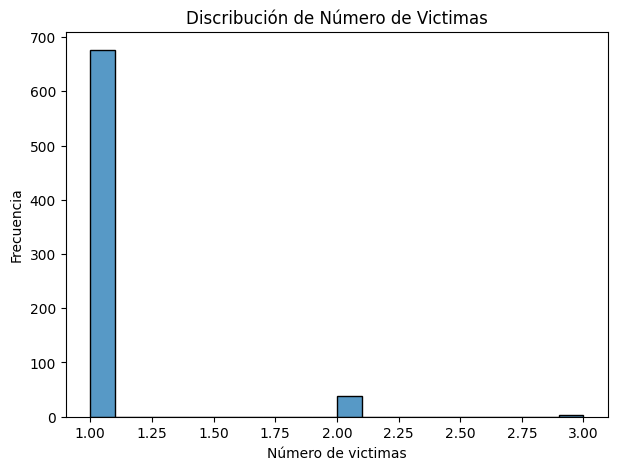

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de la columna N_VICTIMAS
plt.figure(figsize=(7,5))
sns.histplot(homicidios['N_VICTIMAS'], bins=20)
plt.title('Discribución de Número de Victimas')
plt.xlabel('Número de victimas')
plt.ylabel('Frecuencia')
plt.show()

La proporción de incidentes con múltiples víctimas es del 5.72%. Esto significa que aproximadamente el 5.72% de los incidentes en nuestro conjunto de datos involucran más de una víctima. Este porcentaje es útil para comprender la frecuencia relativa de eventos con múltiples víctimas en comparación con el total de incidentes.

In [59]:
prop_multivictimas = (homicidios['N_VICTIMAS'] > 1).mean()
print(f'Proporción de incidentes con múltiples víctimas: {prop_multivictimas:.2%}')

Proporción de incidentes con múltiples víctimas: 5.72%


La media mas alta la tiene el año 2017 con 1.14 además de ser el unico años que registro accidentes con mas de 2 vicitmas fatales.

In [60]:
# Vamos a analizar la cantidad de victimas a lo largo del tiempo

homicidios['FECHA'] = pd.to_datetime(homicidios['FECHA'])
homicidios['AÑO'] = homicidios['FECHA'].dt.year

# Estadísticas descriptivas por año
stats_por_año = homicidios.groupby('AÑO')['N_VICTIMAS'].describe()
stats_por_año

,count,mean,std,min,25%,50%,75%,max
AÑO,,,,,,,,
2016,146.0,1.027397,0.163800,1.0,1.0,1.0,1.0,2.0
2017,140.0,1.142857,0.408038,1.0,1.0,1.0,1.0,3.0
2018,149.0,1.080537,0.273040,1.0,1.0,1.0,1.0,2.0
2019,104.0,1.019231,0.138000,1.0,1.0,1.0,1.0,2.0
2020,81.0,1.074074,0.263523,1.0,1.0,1.0,1.0,2.0
2021,97.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


Claramente el número de accidentes tiene su lustre en el 2018, la depresión del año 2020 podemos inferir que es debido a la pandemia por COVID-19, la diferencia entre el 2018 y 2020 es de 54,3%.

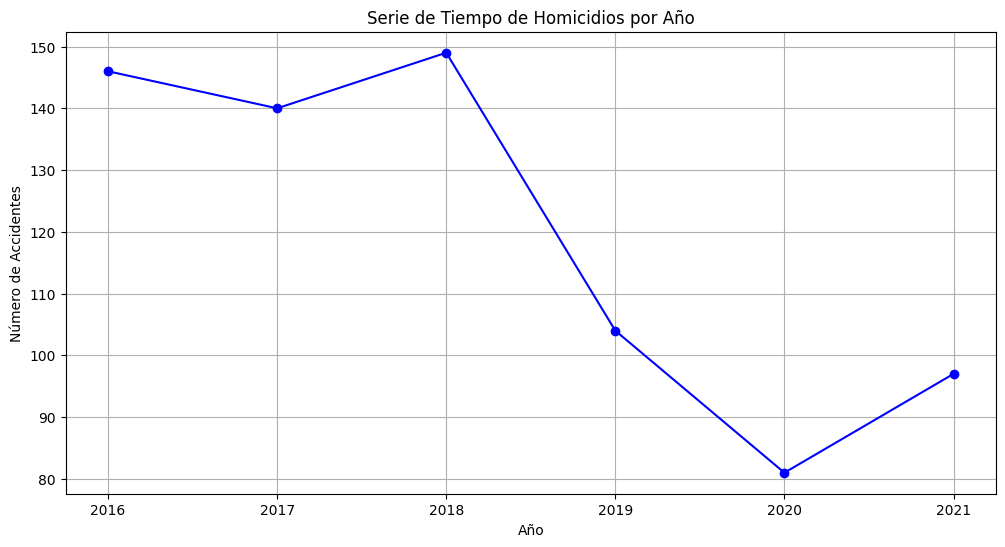

In [61]:
# Vamos a graficar el número numero de incidentes por año generando un nuevo dataframe y graficandolo
# en unsa serie de tiempo
serie_tiempo_data = homicidios.groupby('AAAA').size().reset_index(name='NUM_ACCIDENTES')

plt.figure(figsize=(12, 6))
plt.plot(serie_tiempo_data['AAAA'], serie_tiempo_data['NUM_ACCIDENTES'], marker='o', linestyle='-', color='b')
plt.title('Serie de Tiempo de Homicidios por Año')
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.grid(True)
plt.show()

El siguiente grafico de barras apiladas muestra que el promedio del mes de diciembre una diferencia a la alza, diciembre del 2020, año en el cual el resto de los meses el número de siniestros disminuyo considerablemente por la pandemia.

<Figure size 1200x800 with 0 Axes>

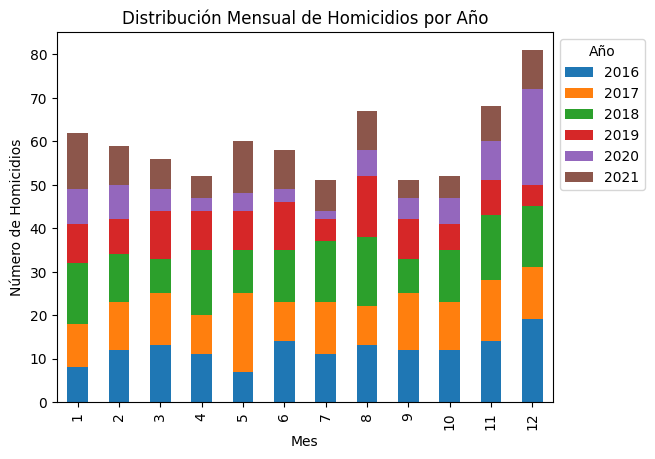

In [62]:
# la línea de código crea un DataFrame llamado distribucion_mensual donde las filas representan meses, 
# las columnas representan años y cada celda contiene el número de homicidios registrado para ese año y mes específico. 
distribucion_mensual = homicidios.groupby(['AAAA', 'MM']).size().unstack().transpose()

# Creamos el gráfico de barras apiladas

plt.figure(figsize=(12,8))
distribucion_mensual.plot(kind='bar', stacked=True)
plt.title('Distribución Mensual de Homicidios por Año')
plt.xlabel('Mes')
plt.ylabel('Número de Homicidios')
plt.legend(title='Año', bbox_to_anchor=(1, 1))
plt.show()


El siguiente gráfico complementa el gráfico anterior y confirma que el mes de diciembre promedia un numero superior de homicidios.

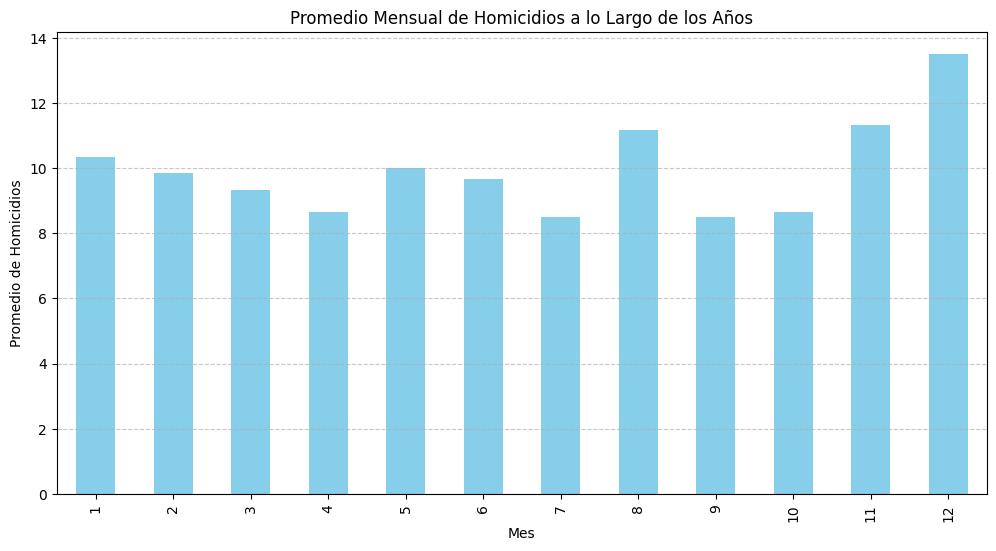

In [63]:
# Agrupa los datos por mes y año y calcula el promedio mensual
promedio_mensual = homicidios.groupby(['MM', 'AAAA']).size().unstack().mean(axis=1)

# Crea el gráfico de barras para visualizar el promedio mensual
plt.figure(figsize=(12, 6))
promedio_mensual.plot(kind='bar', color='skyblue')
plt.title('Promedio Mensual de Homicidios a lo Largo de los Años')
plt.xlabel('Mes')
plt.ylabel('Promedio de Homicidios')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Aquí mostramos con números el promedio por mes

In [64]:
promedio_mensual = homicidios.groupby(['MM', 'AAAA']).size().unstack().mean(axis=1)

promedio_mensual = pd.DataFrame(promedio_mensual)
# Imprime el promedio mensual en números
print("Promedio Mensual de Homicidios:")
promedio_mensual

Promedio Mensual de Homicidios:


,0
MM,
1,10.333333
2,9.833333
3,9.333333
4,8.666667
5,10.000000
6,9.666667
7,8.500000
8,11.166667
9,8.500000


Analizando los históricos por día del mes, se evidencia que el dia 20 es el único que tiene una distribución con mas de 30 homicidios.

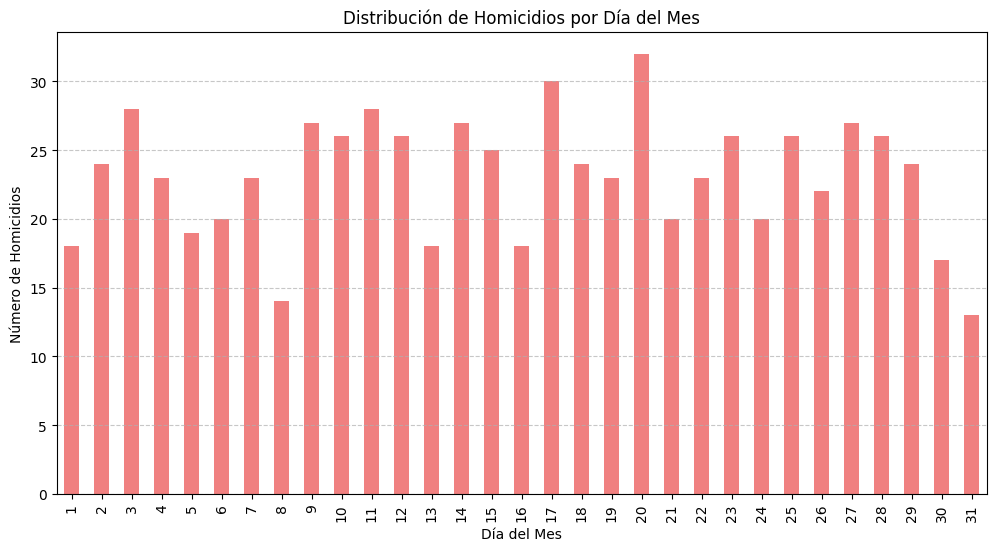

In [65]:
# Agrupa los datos por día del mes y cuenta el número de homicidios para cada día
distribucion_dias = homicidios.groupby('DD').size()

# Crea el gráfico de barras para visualizar la distribución de homicidios por día del mes
plt.figure(figsize=(12, 6))
distribucion_dias.plot(kind='bar', color='lightcoral')
plt.title('Distribución de Homicidios por Día del Mes')
plt.xlabel('Día del Mes')
plt.ylabel('Número de Homicidios')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Al examinar las horas de mayor ocurrencia de siniestros, notamos que las horas pico son las 5, 6 y 7. Curiosamente, estas no son horas laborables, lo que sugiere que estos eventos pueden ser el resultado de la imprudencia, como conducir bajo la influencia de sustancias o condiciones adversas.

Este patrón horario podría ser fundamental para orientar estrategias de prevención y concienciación, enfocándose en la promoción de conductas seguras durante estas horas específicas del día.

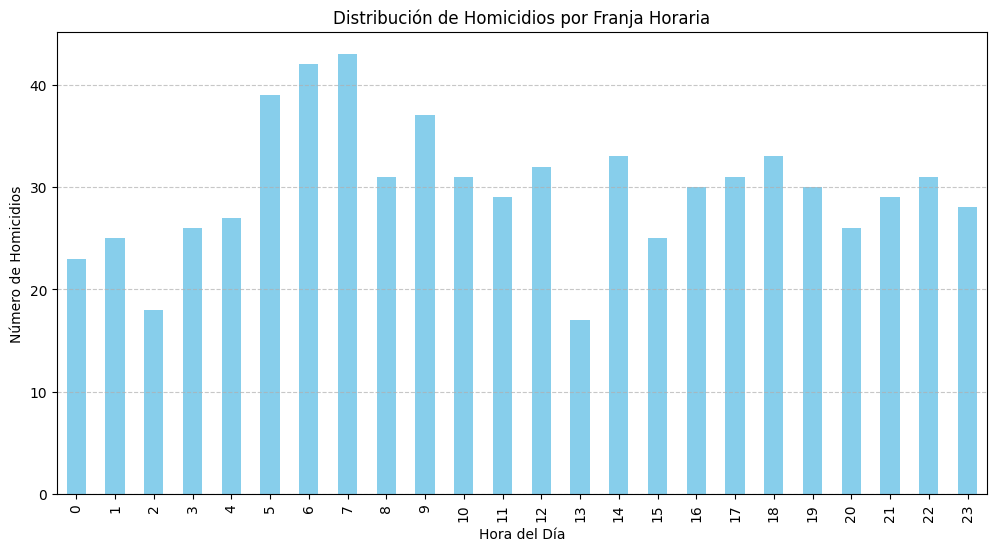

In [66]:
# Agrupa los datos por hora del día y cuenta el número de homicidios para cada hora
distribucion_horaria = homicidios.groupby('HH').size()

# Define el orden personalizado de las horas
orden_horas = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']

# Reordena las horas según el orden personalizado
distribucion_horaria = distribucion_horaria.reindex(orden_horas)

# Crea el gráfico de barras para visualizar la distribución de homicidios por hora del día
plt.figure(figsize=(12, 6))
distribucion_horaria.plot(kind='bar', color='skyblue')
plt.title('Distribución de Homicidios por Franja Horaria')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Homicidios')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Hemos contrastado el día de la semana y la hora en un mapa de calor, revelando un dato notable: a las 6 horas de los sábados y domingos, observamos un incremento en la ocurrencia de siniestros. Esta tendencia sugiere la posibilidad de que este aumento esté relacionado con el consumo de alcohol a altas horas de la noche durante el fin de semana.

La asociación entre la hora específica y el día de la semana puede proporcionar valiosas percepciones para la implementación de medidas preventivas y estrategias de concienciación, especialmente dirigidas a reducir los siniestros relacionados con el consumo de alcohol en esos momentos específicos.

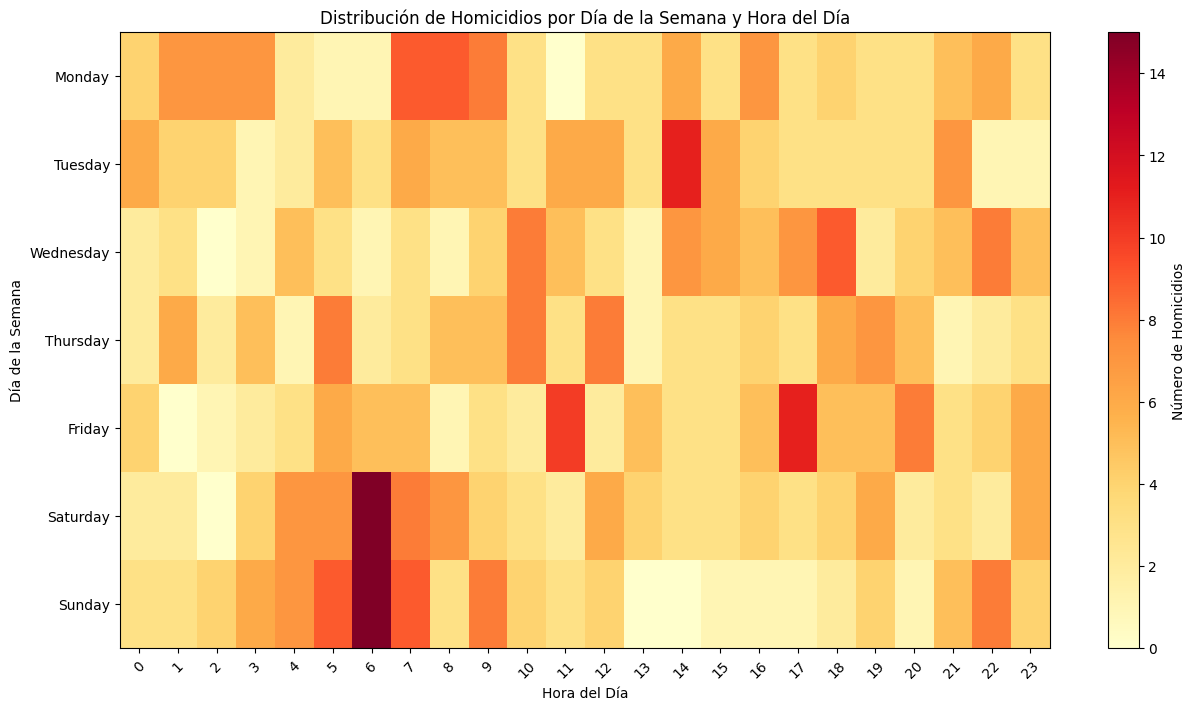

In [67]:
homicidios['HH'] = homicidios['HH'].astype(str)

# Convierte 'FECHA' a tipo datetime
homicidios['FECHA'] = pd.to_datetime(homicidios['FECHA'])

# Extrae el día de la semana y la hora del día
homicidios['DIA_SEMANA'] = homicidios['FECHA'].dt.day_name()

# Define el orden de las horas
orden_horas = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']

# Crea una categoría ordenada para 'HH'
homicidios['HH'] = pd.Categorical(homicidios['HH'], categories=orden_horas, ordered=True)

# Agrupa los datos por día de la semana y hora del día y cuenta el número de homicidios para cada combinación
distribucion_dia_hora = homicidios.groupby(['DIA_SEMANA', 'HH']).size().unstack()

# Ordena los días de la semana cronológicamente
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
distribucion_dia_hora = distribucion_dia_hora.reindex(dias_ordenados)

# Crea el gráfico de heatmap para visualizar la distribución de homicidios por día y hora
plt.figure(figsize=(15, 8))
plt.imshow(distribucion_dia_hora, cmap='YlOrRd', aspect='auto')
plt.colorbar(label='Número de Homicidios')
plt.title('Distribución de Homicidios por Día de la Semana y Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Día de la Semana')
plt.xticks(range(len(distribucion_dia_hora.columns)), distribucion_dia_hora.columns, rotation=45)
plt.yticks(range(len(distribucion_dia_hora.index)), distribucion_dia_hora.index)
plt.show()


El siguiente conteo muestra que en las Avenidas en numero de siniestros es considerablemente mayor en comparación con otros tipos de arterias viales.

In [68]:
# Conteo de valores únicos en la columna TIPO_DE_CALLE
conteo_tipo_calle = homicidios['TIPO_DE_CALLE'].value_counts()

# Visualizar el conteo
conteo_tipo_calle


TIPO_DE_CALLE
AVENIDA      442
CALLE        138
GRAL PAZ      69
AUTOPISTA     68
Name: count, dtype: int64

Para complementar lo dicho anteriormente, el siguiente gráfico de torta ilustra la distribución de homicidios según el tipo de arteria vial. Este gráfico refuerza la observación de que las avenidas presentan un porcentaje considerablemente alto de homicidios en comparación con otros tipos de arterias viales. Esta información puede ser crucial al desarrollar estrategias específicas para mejorar la seguridad en estas áreas de la ciudad.

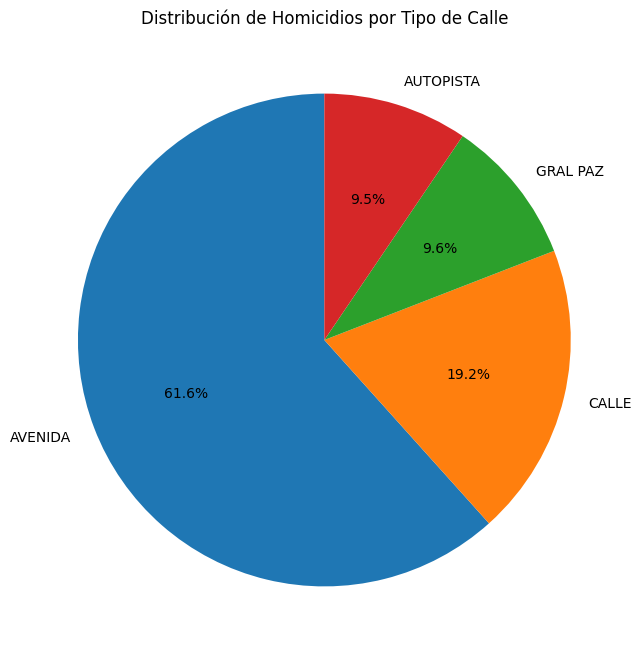

In [69]:
# Crea un gráfico de pastel
plt.figure(figsize=(8, 8))
homicidios['TIPO_DE_CALLE'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Homicidios por Tipo de Calle')
plt.ylabel('')
plt.show()


La tabla presenta el porcentaje de homicidios por comuna, destacando que la Comuna 1 tiene el porcentaje más alto con un 12.97%, seguida por la Comuna 4 con un 11.02%. Esto nos permite focalizar esfuerzos de seguridad y prevención en las comunas con mayores porcentajes de homicidios.

In [70]:
# Calcula el porcentaje de homicidios por comuna
porcentaje_por_comuna = (homicidios.groupby('COMUNA').size() / len(homicidios)) * 100
porcentaje_por_comuna = porcentaje_por_comuna.reset_index(name='Porcentaje')

porcentaje_por_comuna

,COMUNA,Porcentaje
0,0,0.278940
1,1,12.970711
2,2,3.486750
3,3,6.415621
4,4,11.018131
5,5,3.068340
6,6,3.068340
7,7,8.647141
8,8,9.344491
9,9,10.460251


En el siguiente gráfico, exploramos la relación entre el tipo de calle y la comuna en términos de homicidios. La visualización confirma que las Avenidas, especialmente en la Comuna 1, concentran una parte significativa de los homicidios.

Este hallazgo refuerza la importancia de implementar medidas específicas de seguridad y prevención en las Avenidas de la Comuna 1, con el objetivo de reducir la incidencia de homicidios en estas áreas específicas.

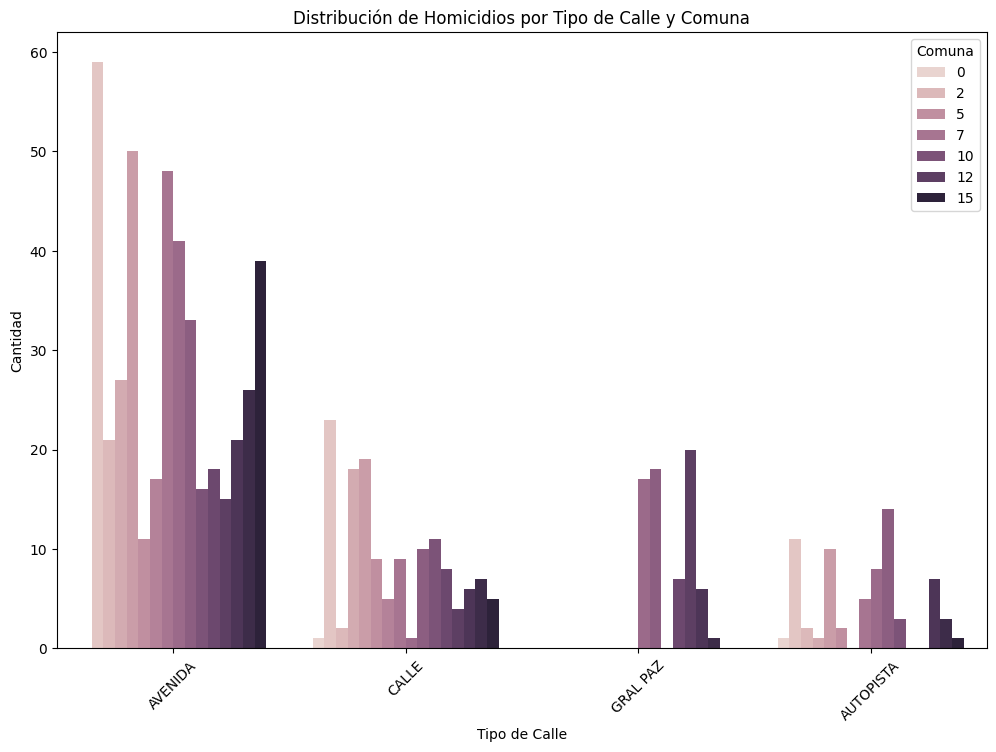

In [71]:
plt.figure(figsize=(12, 8))
sns.countplot(x='TIPO_DE_CALLE', hue='COMUNA', data=homicidios, order=homicidios['TIPO_DE_CALLE'].value_counts().index)
plt.title('Distribución de Homicidios por Tipo de Calle y Comuna')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Comuna', bbox_to_anchor=(1, 1))
plt.show()


el siguiente gráfico muestra que la categoría AVENIDA y los años 2016, 2017, 2018 presentan el mayor número de homicidios.

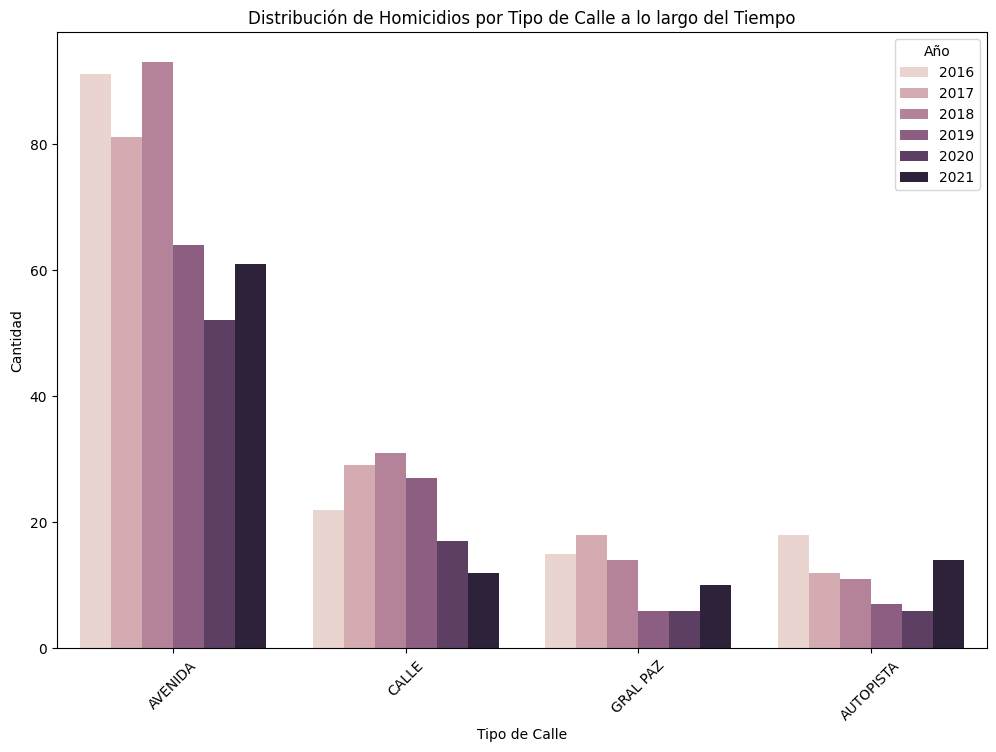

In [72]:
# Generamos un gráfico segun el tipo de calle y el año
homicidios['FECHA'] = pd.to_datetime(homicidios['FECHA'])

plt.figure(figsize=(12, 8))
sns.countplot(x='TIPO_DE_CALLE', hue='AAAA', data=homicidios, order=homicidios['TIPO_DE_CALLE'].value_counts().index)
plt.title('Distribución de Homicidios por Tipo de Calle a lo largo del Tiempo')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Año', bbox_to_anchor=(1, 1))
plt.show()


Procedemos a mostrar algunos datos numericos con respecto a tipo de calle y al año

In [73]:
# Obtiene los valores para el DataFrame
conteo_tipo_calle_anio = homicidios.groupby(['TIPO_DE_CALLE', 'AAAA']).size().reset_index(name='Cantidad')

# Muestra el DataFrame
conteo_tipo_calle_anio

,TIPO_DE_CALLE,AAAA,Cantidad
0,AUTOPISTA,2016,18
1,AUTOPISTA,2017,12
2,AUTOPISTA,2018,11
3,AUTOPISTA,2019,7
4,AUTOPISTA,2020,6
5,AUTOPISTA,2021,14
6,AVENIDA,2016,91
7,AVENIDA,2017,81
8,AVENIDA,2018,93
9,AVENIDA,2019,64


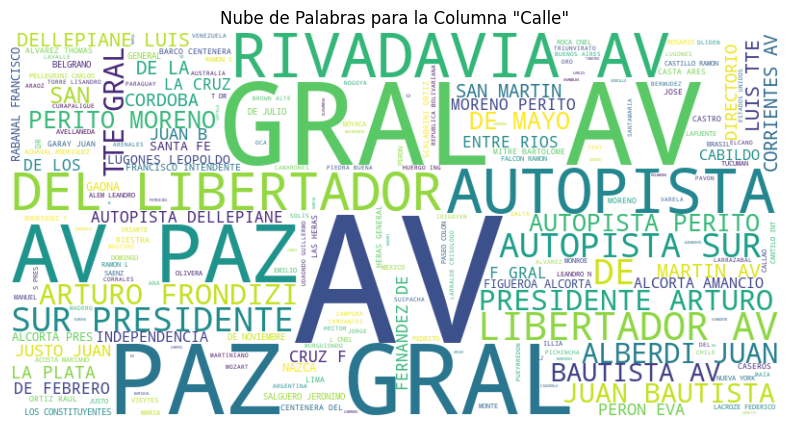

In [74]:

from wordcloud import WordCloud

# Crear una cadena única con todas las calles
calle_texto = ' '.join(homicidios['Calle'])

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(calle_texto)

# Visualiza la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para la Columna "Calle"')
plt.show()


La siguiente tabla presenta el top 10 de las arterias viales con mayor cantidad de siniestros. La Avenida Gral. Paz encabeza la lista con 61 siniestros, seguida por la Avenida Rivadavia con 20 y la Avenida del Libertador con 19. Este análisis es crucial para priorizar intervenciones y medidas preventivas específicas en estas arterias viales con mayores incidencias de siniestros.

In [75]:
# Conteo de las calles más comunes
calles_comunes = homicidios['Calle'].value_counts().head(10)

# Creamos un DataFrame a partir de la serie
df_calles_comunes = pd.DataFrame({'Calle': calles_comunes.index, 'Cantidad': calles_comunes.values})

df_calles_comunes

,Calle,Cantidad
0,"PAZ, GRAL. AV.",61
1,RIVADAVIA AV.,20
2,DEL LIBERTADOR AV.,19
3,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,14
4,AUTOPISTA PERITO MORENO,13
5,"ALBERDI, JUAN BAUTISTA AV.",13
6,AUTOPISTA 25 DE MAYO,12
7,SAN MARTIN AV.,11
8,CORRIENTES AV.,11
9,CORDOBA AV.,10


El análisis de las direcciones normalizadas más comunes muestra que ciertos puntos de la ciudad tienen una mayor incidencia de homicidios. Aquí algunos hallazgos clave:

27 DE FEBRERO AV. y ESCALADA AV. (5 homicidios): Este cruce de avenidas parece ser un lugar de mayor riesgo, con una concentración significativa de incidentes.

PAZ, GRAL. AV. y DEL LIBERTADOR AV. (4 homicidios): Este cruce de dos avenidas importantes también muestra una incidencia considerable de homicidios.

ALCORTA, AMANCIO AV. y BONAVENA, OSCAR NATALIO (3 homicidios): Otro cruce que registra una cantidad significativa de incidentes.

INDEPENDENCIA AV. y CEVALLOS, VIRREY (3 homicidios): Una intersección en la que se han producido múltiples homicidios.

DEL LIBERTADOR AV. y RAMOS MEJIA, JOSE MARIA, DR. AV. (3 homicidios): Otro cruce de avenidas importantes con una presencia notoria en el recuento.

Estos hallazgos sugieren que ciertos puntos específicos de la ciudad pueden requerir una atención especial en términos de seguridad pública y medidas preventivas. Además, podría ser valioso explorar más detalles sobre la naturaleza de estos incidentes para comprender mejor las circunstancias y tomar medidas adecuadas para abordar el problema.

In [76]:
# Conteo de direcciones normalizadas más comunes excluyendo valores "SD"
frecuencia_direcciones = homicidios[homicidios['Dirección Normalizada'] != 'SD']['Dirección Normalizada'].value_counts().head(20)

# Mostrar el conteo
print(frecuencia_direcciones)


Dirección Normalizada
27 DE FEBRERO AV. y ESCALADA AV.                            5
PAZ, GRAL. AV. y DEL LIBERTADOR AV.                         4
PAZ, GRAL. AV. y BALBIN, RICARDO, DR. AV.                   4
ALCORTA, AMANCIO AV. y BONAVENA, OSCAR NATALIO              3
ACHAVAL RODRIGUEZ, T., DR. AV. y VILLAFLOR, AZUCENA         3
INDEPENDENCIA AV. y CEVALLOS, VIRREY                        3
DEL LIBERTADOR AV. y RAMOS MEJIA, JOSE MARIA, DR. AV.       3
PAZ, GRAL. AV. y DE LOS CORRALES AV.                        3
CASTILLO, RAMON S., PRES. AV. y CALLE 12 (NO OFICIAL)       3
SALGUERO, JERONIMO y RIVADAVIA AV.                          2
RABANAL, FRANCISCO, INTENDENTE AV. y SAENZ AV.              2
DEL LIBERTADOR AV. 4100                                     2
PAZ, GRAL. AV. y DONADO                                     2
AUTOPISTA 25 DE MAYO y BOEDO AV.                            2
LAS HERAS GENERAL AV. y DIAZ, CNEL. AV.                     2
RIESTRA AV. y CAÃ‘ADA DE GOMEZ                  

Aqui vemos mediante datos númericos el número de homicidios por comuna, siendo la comuna 1 la que presenta mas siniestros.

In [77]:
# Conteo de comunas más homicidios
frecuencia_comunas = homicidios['COMUNA'].value_counts().sort_index()

# Mostrar el conteo
print(frecuencia_comunas)

COMUNA
0      2
1     93
2     25
3     46
4     79
5     22
6     22
7     62
8     67
9     75
10    30
11    33
12    39
13    40
14    37
15    45
Name: count, dtype: int64


Hemos creado un mapa de calor que representa la distribución de homicidios según el año y la comuna. Este mapa confirma las tendencias observadas en los datos numéricos recientemente presentados. Es notable el aumento de incidentes en la comuna 1, con especial énfasis en los años 2016, 2017 y 2018 en comparación con otras categorías. Este análisis visual resalta la importancia de estas áreas y períodos en particular en relación con los homicidios registrados.

C:\Users\DELL\AppData\Local\Temp\ipykernel_12020\2250563496.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


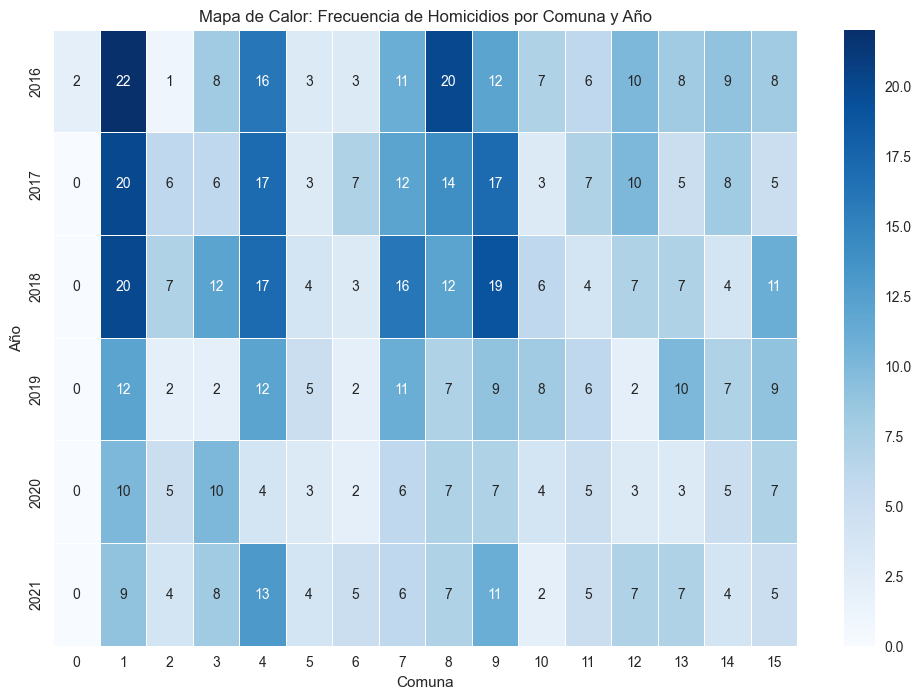

In [78]:
# Configuración de estilo
plt.style.use('seaborn')

# Crear un gráfico de calor
plt.figure(figsize=(12, 8))
heatmap_data = homicidios.pivot_table(index='AAAA', columns='COMUNA', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='g', linewidths=.5)
plt.title('Mapa de Calor: Frecuencia de Homicidios por Comuna y Año')
plt.xlabel('Comuna')
plt.ylabel('Año')
plt.show()

Aqui mostramos mediante un gráfico de barras la ocurrencia de homicidios por comuna.

C:\Users\DELL\AppData\Local\Temp\ipykernel_12020\801757347.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


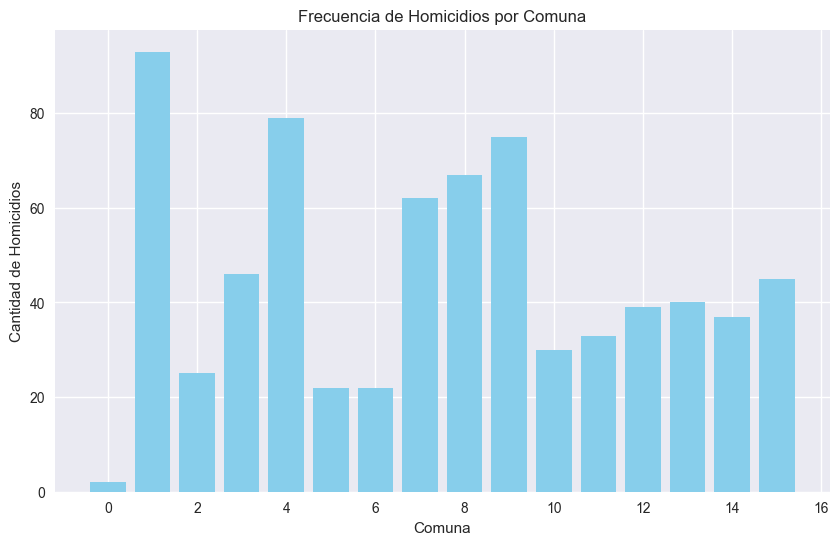

In [79]:
# Configuración de estilo
plt.style.use('seaborn')

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(frecuencia_comunas.index, frecuencia_comunas.values, color='skyblue')
plt.title('Frecuencia de Homicidios por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Homicidios')
plt.show()

Mostramos mediante datos numéricos la ocurrencia de homicidios agrupandolos por participantes.

In [80]:
participantes_counts = homicidios['PARTICIPANTES'].value_counts()
print(participantes_counts)

PARTICIPANTES
PEATON-PASAJEROS       105
MOTO-AUTO               84
MOTO-CARGAS             80
PEATON-AUTO             79
MOTO-PASAJEROS          50
MOTO-OBJETO FIJO        40
PEATON-CARGAS           38
AUTO-AUTO               33
PEATON-MOTO             30
AUTO-OBJETO FIJO        28
MOTO-MOTO               25
MULTIPLE                17
AUTO-CARGAS             15
AUTO-PASAJEROS          10
BICICLETA-CARGAS        10
MOTO-SD                  9
BICICLETA-PASAJEROS      8
BICICLETA-AUTO           8
SD-SD                    5
PEATON-BICICLETA         5
CARGAS-CARGAS            4
PEATON-SD                4
AUTO-SD                  4
PASAJEROS-PASAJEROS      3
SD-AUTO                  2
MOVIL-CARGAS             2
MOTO-BICICLETA           2
MOTO-OTRO                2
PEATON_MOTO-MOTO         2
MOTO-MOVIL               2
BICICLETA-OTRO           1
AUTO-MOVIL               1
BICICLETA-TREN           1
CARGAS-PASAJEROS         1
CARGAS-AUTO              1
PASAJEROS-AUTO           1
SD-MOTO       

En el siguente codigo separamos a los participantes para ver su incidencia en los homicidios, decidimos mostrar mediante un gráfico de torta el top 4, siendo MOTO con un 43,6% el mayor participante en los homicidios.

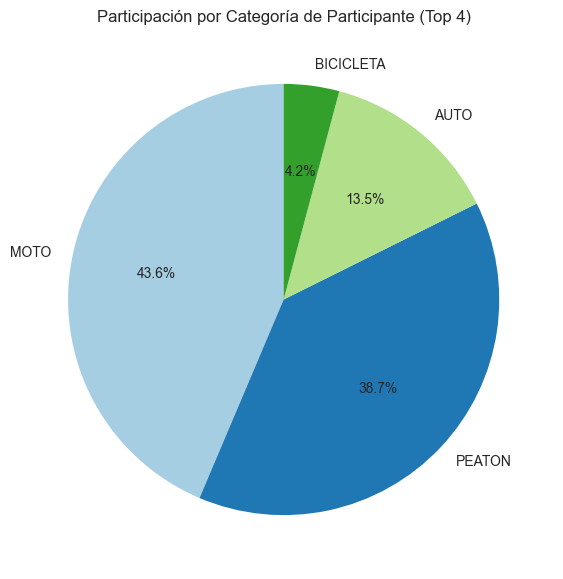

In [81]:
# Crear una columna nueva con la categoría principal de cada participante
homicidios['Categoria_Participante'] = homicidios['PARTICIPANTES'].str.split('-').str[0]

# Conteo de la frecuencia de cada categoría
conteo_categorias = homicidios['Categoria_Participante'].value_counts()

# Seleccionar solo las primeras 4 categorías
conteo_categorias_top4 = conteo_categorias.head(4)

# Crear un gráfico de pastel
plt.figure(figsize=(7, 7))
plt.pie(conteo_categorias_top4, labels=conteo_categorias_top4.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Participación por Categoría de Participante (Top 4)')
plt.show()


Ahora mostramos la frecuencia de top 4 de participantes mediante el tipo de calle, es evidente que el número de accidentes en avenidas donde se involucran motos y peatones es muy superior con respecto a otros tipos de calle y otras categorías de participantes.

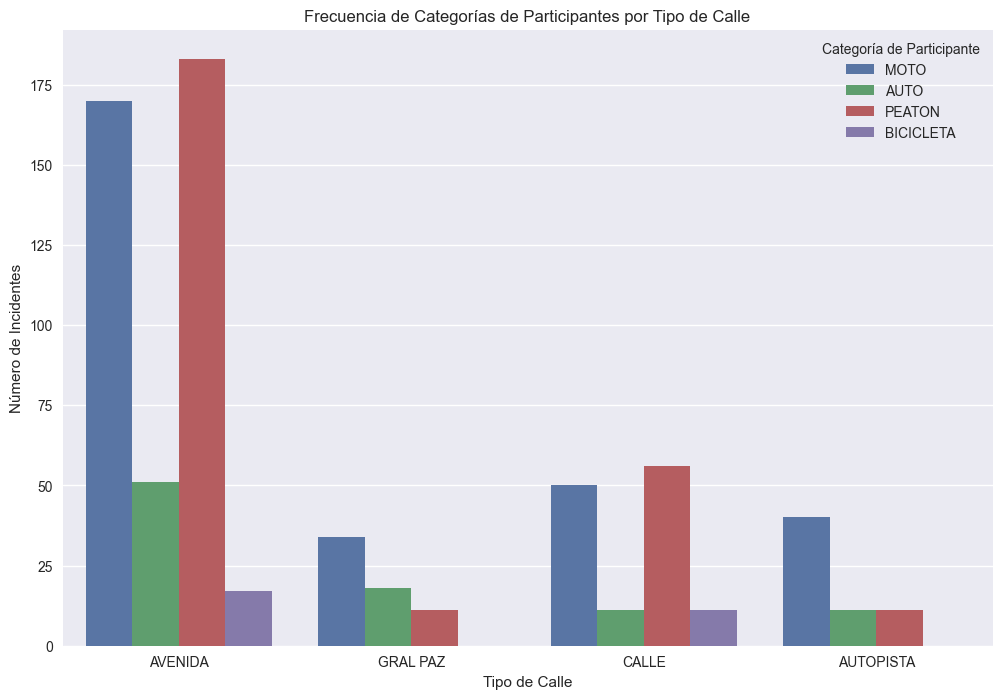

In [82]:
# Selecciona solo las primeras 4 categorías de participantes
categorias_top4 = homicidios['Categoria_Participante'].value_counts().head(4).index

# Filtra el DataFrame para incluir solo las primeras 4 categorías
subset_top4 = homicidios[homicidios['Categoria_Participante'].isin(categorias_top4)]

# Crea un gráfico de barras
plt.figure(figsize=(12, 8))
sns.countplot(x='TIPO_DE_CALLE', hue='Categoria_Participante', data=subset_top4)
plt.title('Frecuencia de Categorías de Participantes por Tipo de Calle')
plt.xlabel('Tipo de Calle')
plt.ylabel('Número de Incidentes')
plt.legend(title='Categoría de Participante')
plt.show()

Aqui seleccionamos el mismo top 4 y lo agrupamos por comuna, conforme a lo dicho en gráficos anteriores, la comuna 1 tiene mas ocurrencia de siniestros, con enfasis en las categorías de moto peaton.

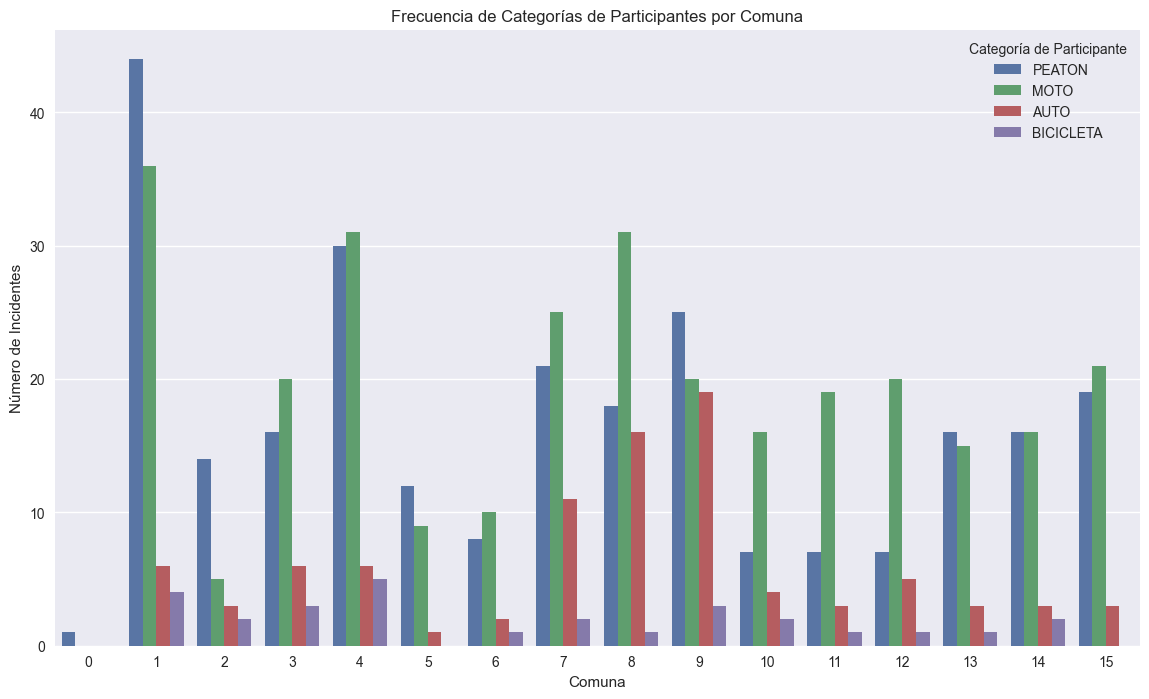

In [83]:
# Selecciona solo las primeras 4 categorías de participantes
categorias_top4 = homicidios['Categoria_Participante'].value_counts().head(4).index

# Filtra el DataFrame para incluir solo las primeras 4 categorías
subset_top4 = homicidios[homicidios['Categoria_Participante'].isin(categorias_top4)]

# Crea un gráfico de barras
plt.figure(figsize=(14, 8))
sns.countplot(x='COMUNA', hue='Categoria_Participante', data=subset_top4)
plt.title('Frecuencia de Categorías de Participantes por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Número de Incidentes')
plt.legend(title='Categoría de Participante')
plt.show()

El siguiente gráfico de violin muestra una proyección de datos referidos a los participantes y al día de la semana, 

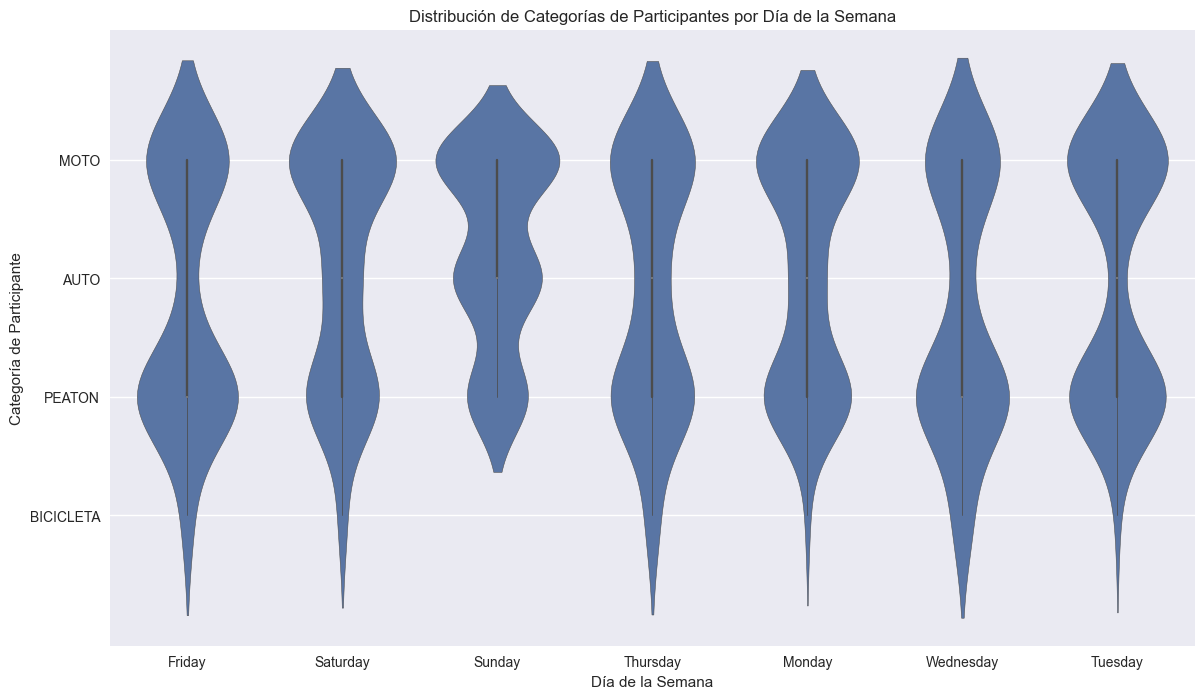

In [84]:
# Creamos un gráfico de violín
plt.figure(figsize=(14, 8))
sns.violinplot(x='DIA_SEMANA', y='Categoria_Participante', data=subset_top4)
plt.title('Distribución de Categorías de Participantes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Categoría de Participante')
plt.show()

Los siguientes 2 gráficos nos muestran la frecuencia de las categorías de victimas y acusados.

Conforme a lo dicho anteriormente, las victimas mas comunes siguen siendo moto y peaton

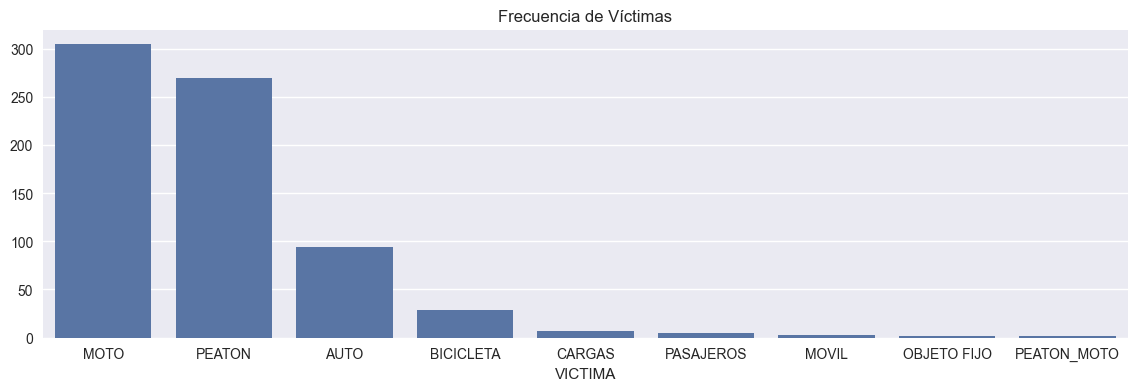

In [85]:
# Conteo de frecuencia para la columna VICTIMA
conteo_victima = homicidios['VICTIMA'].value_counts()

# Creamos gráficos de barras
plt.figure(figsize=(14, 4))
sns.barplot(x=conteo_victima.index, y=conteo_victima.values)
plt.title('Frecuencia de Víctimas')


plt.show()


Auto, Pasajeros y Cargas componen a los mas acusados, pero algo que llama la atención en el numero de siniestros con objetos fijos, esto puede deberse a muchas causas, imprudencia, exceso de velocidad inclusive condiciones ambientales adversas, para futuros estudios se recomienta proporcionar detalles como 'Causa de Siniestro' lo cual permitirá estudios mas complejos.

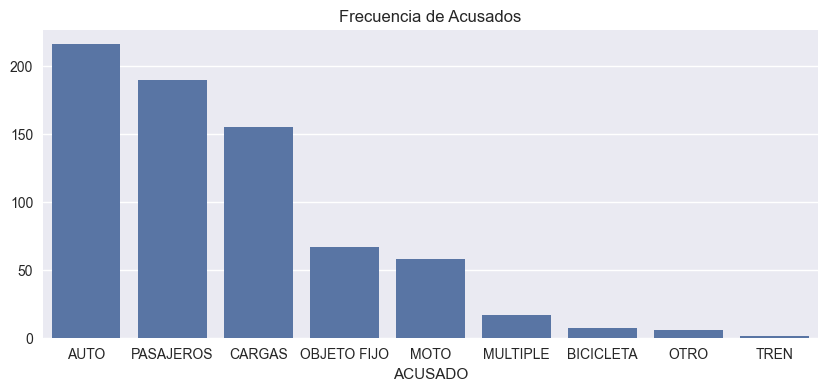

In [86]:
# Conteo de frecuencia para la columna ACUSADOS
conteo_acusados = homicidios['ACUSADO'].value_counts()

# Creamos el gráficos de barras
plt.figure(figsize=(10, 4))

sns.barplot(x=conteo_acusados.index, y=conteo_acusados.values)
plt.title('Frecuencia de Acusados')

plt.show()

Aqui mostramos la relación de victimas y acusados, la incidencia entre pasajeros y peaton, en este estudio estamos suponiendo que Pasajeros se refieren a unidades de transporte público, con respeco a esto recomendamos revisar las regulaciones legales a los medios de transporte públicos, asi como señalizaciones viales y peatonales.

<Figure size 1600x800 with 0 Axes>

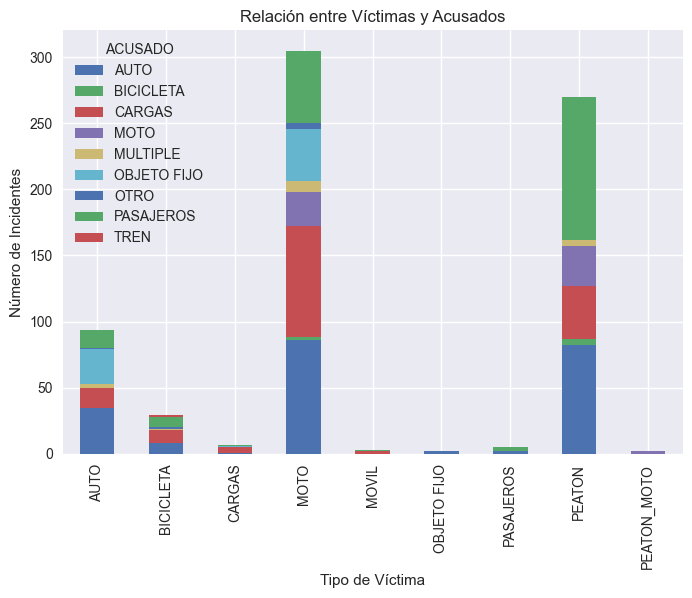

In [87]:
relacion_victima_acusados = pd.crosstab(homicidios['VICTIMA'], homicidios['ACUSADO'])

# Crear un gráfico de barras apiladas
plt.figure(figsize=(16, 8))
relacion_victima_acusados.plot(kind='bar', stacked=True)
plt.title('Relación entre Víctimas y Acusados')
plt.xlabel('Tipo de Víctima')
plt.ylabel('Número de Incidentes')
plt.show()

En el siguiente gráfico de barras apiladas se muestra lo dicho en gráficos anteriores, Autos, Cargas y Pasajeros lideran el número de acusados.

<Figure size 1600x800 with 0 Axes>

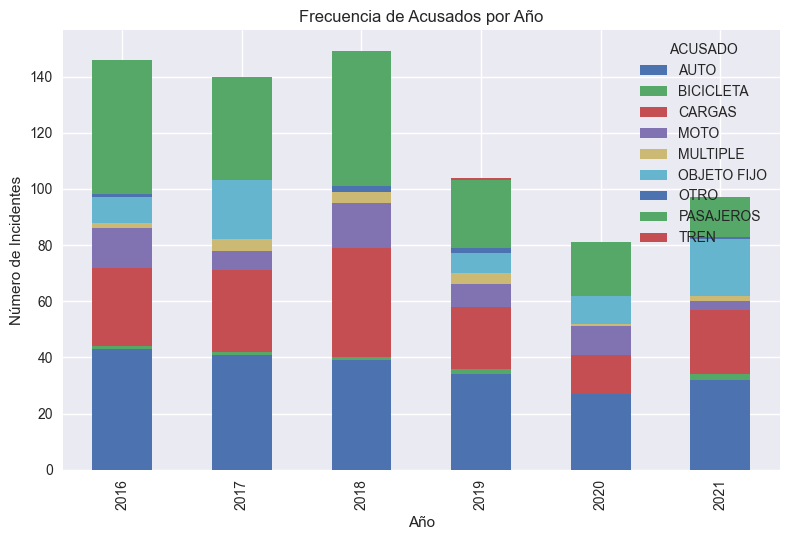

In [88]:

# Conteo de frecuencia para la columna ACUSADOS por año
conteo_acusados_por_año = homicidios.groupby(['AAAA', 'ACUSADO']).size().unstack()

# Crear gráficos de barras apiladas
plt.figure(figsize=(16, 8))
conteo_acusados_por_año.plot(kind='bar', stacked=True)
plt.title('Frecuencia de Acusados por Año')
plt.xlabel('Año')
plt.ylabel('Número de Incidentes')

plt.tight_layout()
plt.show()

Peatón y Moto se muestran como los mas susceptibles a perecer en los sinistros estudiados. Eso es lo que demuestra el siguiente gráfico el cual estudiamos con respecto al año

<Figure size 1600x800 with 0 Axes>

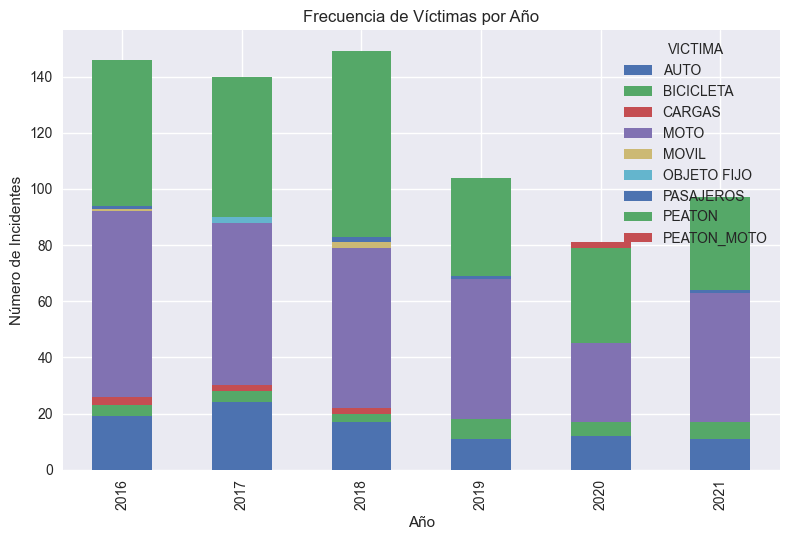

In [89]:
# Conteo de frecuencia para la columna VICTIMA por año
conteo_victima_por_año = homicidios.groupby(['AAAA', 'VICTIMA']).size().unstack()

# Crear gráficos de barras apiladas para Víctimas
plt.figure(figsize=(16, 8))
conteo_victima_por_año.plot(kind='bar', stacked=True)
plt.title('Frecuencia de Víctimas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Incidentes')

plt.tight_layout()
plt.show()

Ahora nos enfocamos en el genero de las victimas, donde el 76,4% de las victimas son hombres.

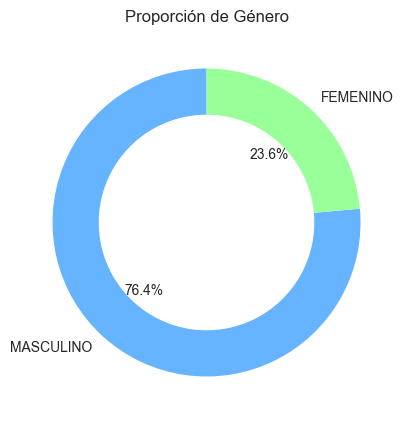

In [90]:
# Conteo de frecuencia para la columna SEXO
conteo_sexo = homicidios['SEXO'].value_counts()

# Crear un gráfico de dona
plt.figure(figsize=(5, 5))
plt.pie(conteo_sexo, labels=conteo_sexo.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3), colors=['#66b3ff','#99ff99'])
plt.title('Proporción de Género')
plt.show()


Mostramos lo mismo pero en un gráfico de violin

C:\Users\DELL\AppData\Local\Temp\ipykernel_12020\2831675984.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='SEXO', y='EDAD', data=homicidios, palette='pastel')


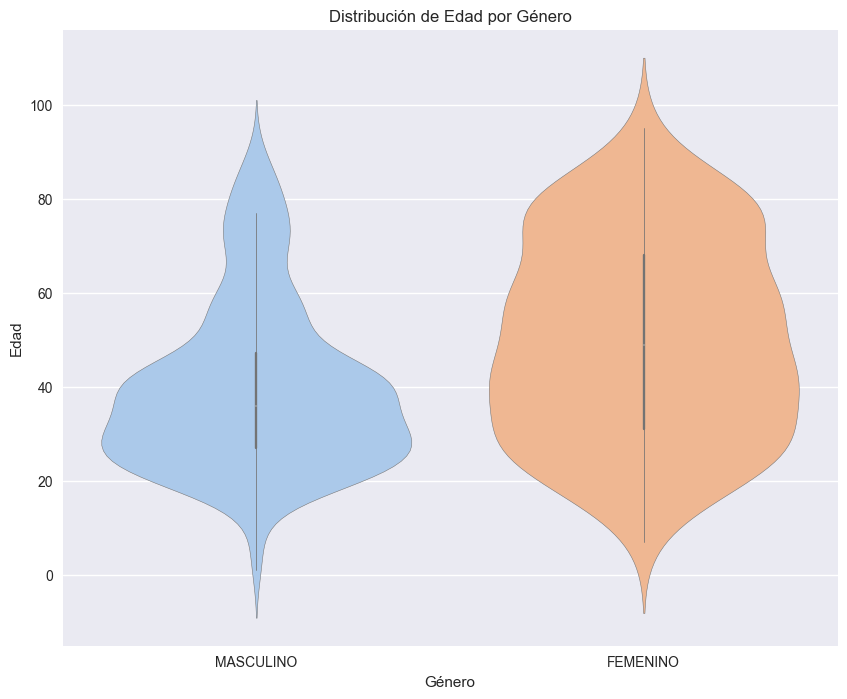

In [91]:
# Creamos un gráfico de violín o caja
plt.figure(figsize=(10, 8))
sns.violinplot(x='SEXO', y='EDAD', data=homicidios, palette='pastel')
plt.title('Distribución de Edad por Género')
plt.xlabel('Género')
plt.ylabel('Edad')
plt.show()


Realizamos una tabla de frecuencia relacionando el género con la comuna. Observamos que las víctimas masculinas tienen su pico en la comuna 1, mientras que las víctimas femeninas fueron más numerosas en la comuna 9.

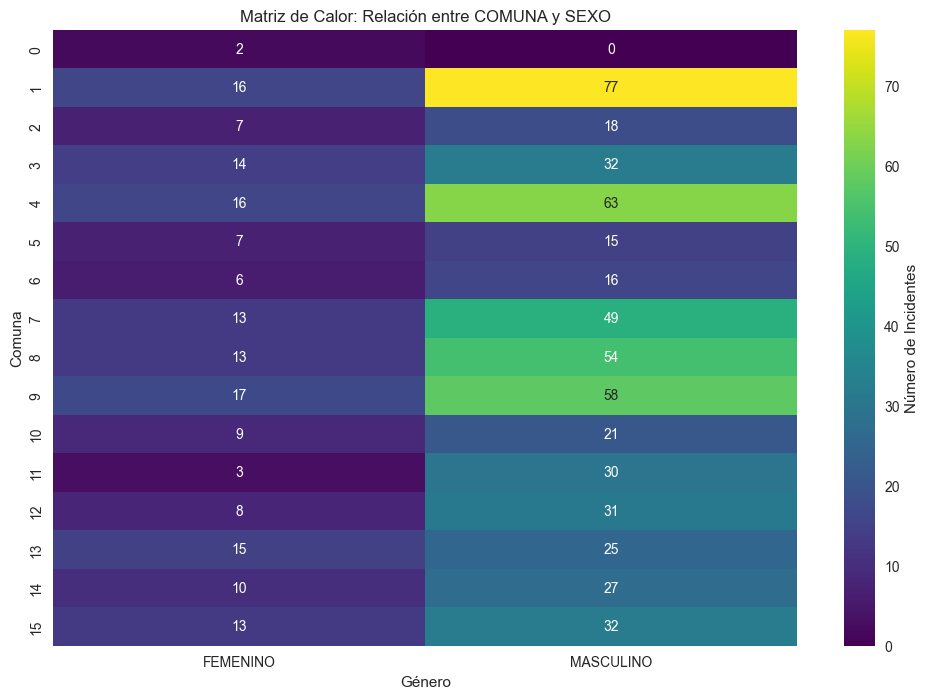

In [92]:
tabla_frecuencia = pd.crosstab(homicidios['COMUNA'], homicidios['SEXO'])


plt.figure(figsize=(12, 8))
sns.heatmap(tabla_frecuencia, annot=True, fmt='d', cmap='viridis', cbar_kws={'label': 'Número de Incidentes'})
plt.title('Matriz de Calor: Relación entre COMUNA y SEXO')
plt.xlabel('Género')
plt.ylabel('Comuna')
plt.show()


En los datos ajustados y analizados recientemente sobre la variable "EDAD" en relación con el "TIPO_DE_CALLE" y el "SEXO" de las víctimas, podemos destacar varias conclusiones significativas:

Distribución por Tipo de Calle:

Las edades de las víctimas varían considerablemente según el tipo de calle.
En general, las avenidas tienen una mayor variabilidad en las edades, mientras que en las calles la variabilidad es moderada.
Diferencias entre Géneros:

En todos los tipos de calles, las mujeres tienden a tener edades promedio más altas en comparación con los hombres.
La variabilidad en las edades de las mujeres es más pronunciada, especialmente en avenidas y calles.
Género y Tipo de Calle:

Las mujeres que son víctimas en avenidas tienen un promedio de edad más alto (50.68 años), mientras que las mujeres en calles tienen el promedio más alto en comparación con otros tipos de calle.
Los hombres que son víctimas en avenidas tienen un promedio de edad más alto (40.77 años), mientras que los hombres en autopistas tienen el promedio más alto entre los tipos de calle.
Generalidad en las Calles:

Independientemente del tipo de calle, se observa que las mujeres tienden a tener edades más altas en comparación con los hombres.

In [93]:
# Estadísticas descriptivas para la edad por tipo de calle y género
estadisticas_descriptivas = homicidios.groupby(['TIPO_DE_CALLE', 'SEXO'])['EDAD'].describe()

# Convertir a DataFrame
df_estadisticas = estadisticas_descriptivas.reset_index()

# Mostrar el DataFrame de estadísticas descriptivas
df_estadisticas

,TIPO_DE_CALLE,SEXO,count,mean,std,min,25%,50%,75%,max
0,AUTOPISTA,FEMENINO,9.0,34.111111,11.084273,23.0,23.00,29.0,42.00,53.0
1,AUTOPISTA,MASCULINO,59.0,34.305085,12.127561,1.0,27.00,33.0,42.00,70.0
2,AVENIDA,FEMENINO,108.0,50.675926,21.428790,12.0,30.75,50.5,69.25,95.0
3,AVENIDA,MASCULINO,334.0,40.757485,19.126837,1.0,26.25,37.0,50.00,91.0
4,CALLE,FEMENINO,42.0,55.500000,20.181191,7.0,42.00,57.0,72.75,87.0
5,CALLE,MASCULINO,96.0,40.395833,16.175016,17.0,28.75,37.0,48.50,88.0
6,GRAL PAZ,FEMENINO,10.0,34.500000,10.987366,19.0,26.75,36.5,41.50,50.0
7,GRAL PAZ,MASCULINO,59.0,38.203390,15.813329,10.0,26.00,37.0,49.00,80.0


En la siguinete línea de tiempo se aprecia que las muertes de ambos generos tuvo su depresión en el 2020 y su auge en el 2018.

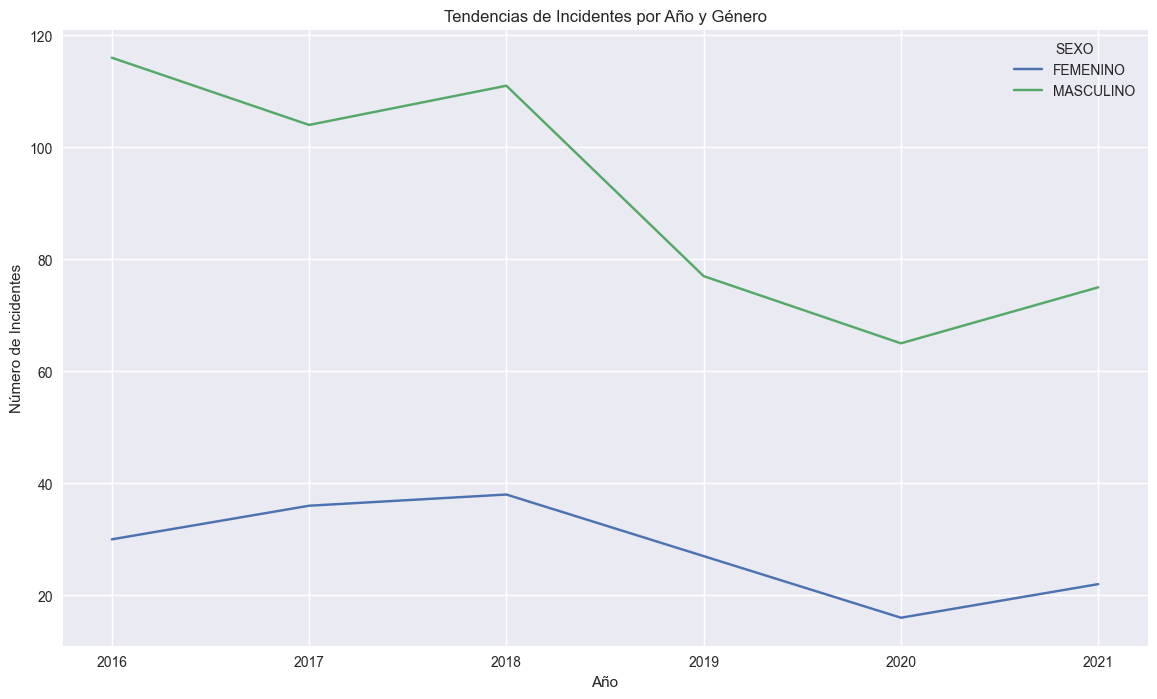

In [94]:

plt.figure(figsize=(14, 8))
sns.lineplot(x='AAAA', y='Número de Incidentes', hue='SEXO', data=homicidios.groupby(['AAAA', 'SEXO']).size().reset_index(name='Número de Incidentes'))
plt.title('Tendencias de Incidentes por Año y Género')
plt.xlabel('Año')
plt.ylabel('Número de Incidentes')
plt.show()

En este gráfico se destaca la relación entre el rol de la víctima y la frecuencia de incidentes, corroborando hallazgos previos. Se observa que el rol de conductor, seguido de peatón, son los que experimentan un mayor número de incidentes fatales. Este patrón coherente refuerza la importancia de medidas preventivas y de seguridad dirigidas tanto a conductores como a peatones para reducir la incidencia de accidentes viales mortales.

C:\Users\DELL\AppData\Local\Temp\ipykernel_12020\3579827296.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ROL', data=homicidios, palette='pastel')


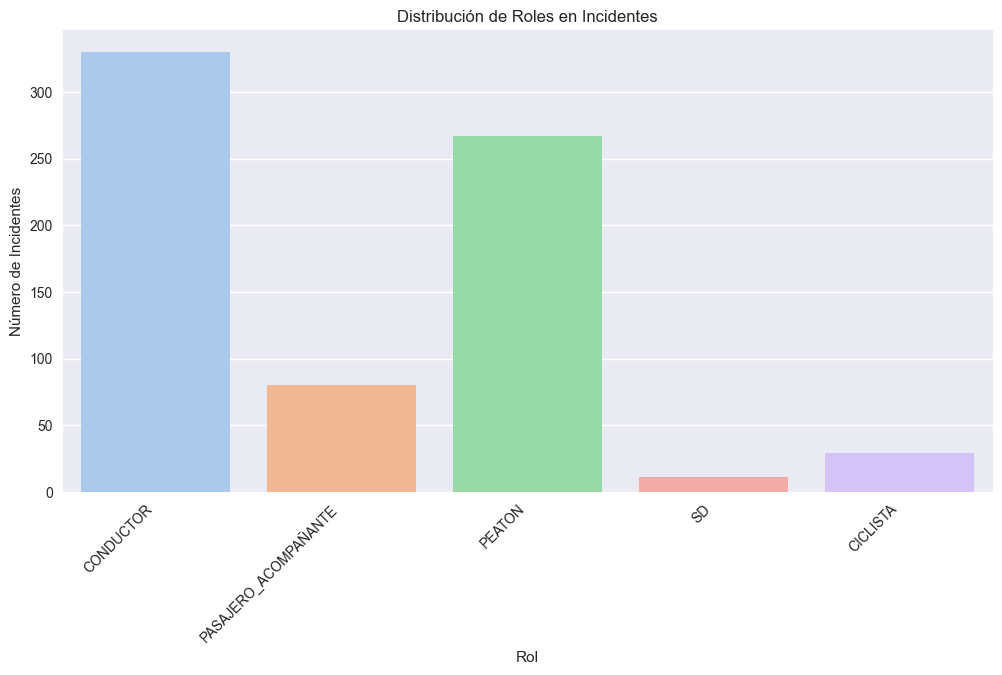

In [95]:
plt.figure(figsize=(12, 6))
sns.countplot(x='ROL', data=homicidios, palette='pastel')
plt.title('Distribución de Roles en Incidentes')
plt.xlabel('Rol')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45, ha='right')
plt.show()

Este gráfico de barras ilustra la distribución de roles de las víctimas según su género. Se destaca que la mayoría de las víctimas masculinas desempeñaban el rol de conductor, mientras que en el caso de las mujeres, predominaba el rol de peatón. Esta disparidad en la distribución resalta la importancia de abordar medidas de seguridad específicas para conductores y peatones, considerando las diferencias de género y los patrones de incidencia en roles específicos.

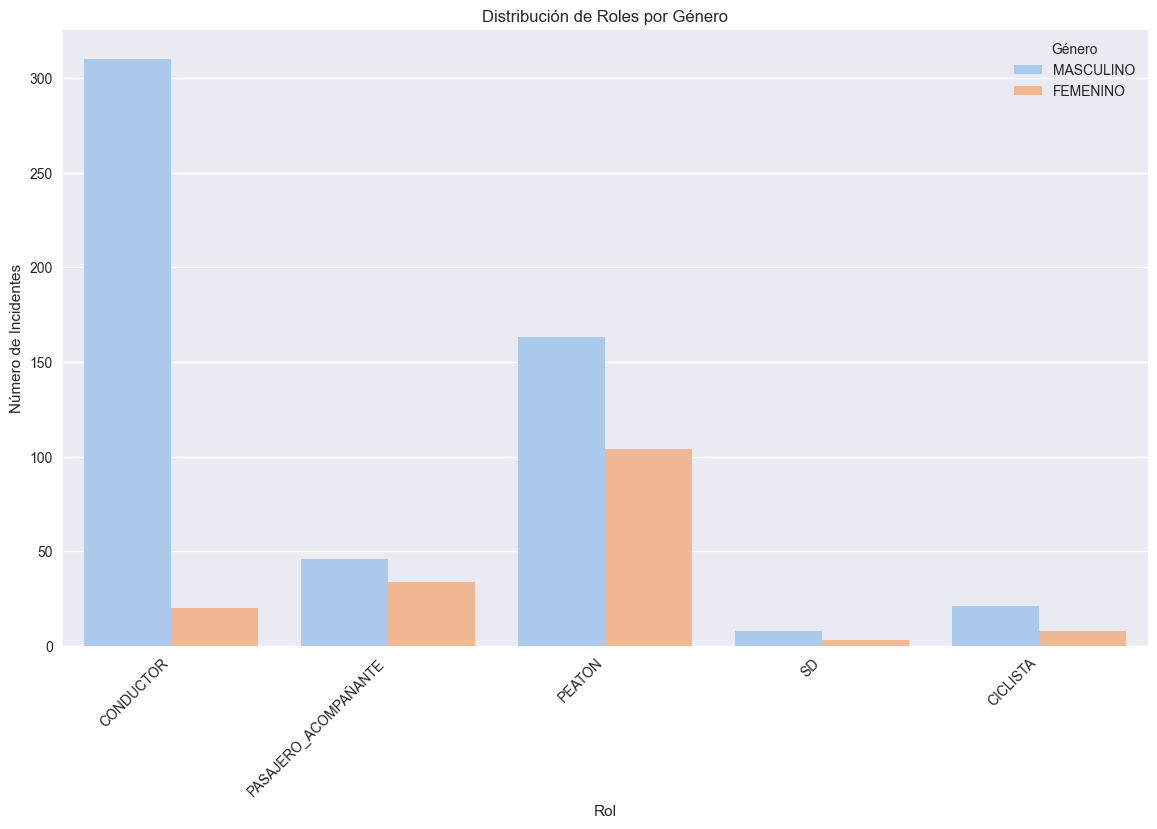

In [96]:
# Crear un gráfico de barras apiladas
plt.figure(figsize=(14, 8))
sns.countplot(x='ROL', hue='SEXO', data=homicidios, palette='pastel')
plt.title('Distribución de Roles por Género')
plt.xlabel('Rol')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Género')
plt.show()


In [97]:

homicidios['FECHA'] = pd.to_datetime(homicidios['FECHA'])
homicidios['FECHA_FALLECIMIENTO'] = pd.to_datetime(homicidios['FECHA_FALLECIMIENTO'])

# Crea la columna FALLECIMIENTO_MISMO_DIA invirtiendo la lógica
homicidios['FALLECIMIENTO_MISMO_DIA'] = (homicidios['FECHA_FALLECIMIENTO'].dt.date == homicidios['FECHA'].dt.date).astype(int)


El gráfico de torta siguiente revela que un significativo 78,8% de las víctimas perdieron la vida el mismo día del accidente, en marcado contraste con el 21,2% de los casos en los que la muerte ocurrió en fechas posteriores. Este hallazgo resalta la agudeza de las consecuencias mortales en la mayoría de los incidentes, enfatizando la importancia de medidas inmediatas y eficaces en términos de atención médica y prevención de accidentes viales.

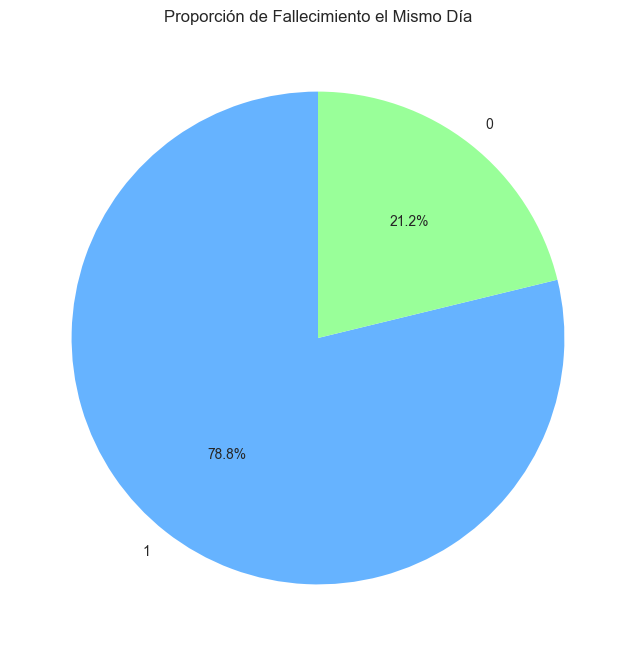

In [98]:
# Calcular proporciones
proporciones = homicidios['FALLECIMIENTO_MISMO_DIA'].value_counts(normalize=True)

# Crear un gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(proporciones, labels=proporciones.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Proporción de Fallecimiento el Mismo Día')
plt.show()

En el siguiente gráfico se puede ver la relación de muertes el mismo día con respecto al género, para tener una idea exacta, en el siguiente código mostraremos la métrica que corresponte.

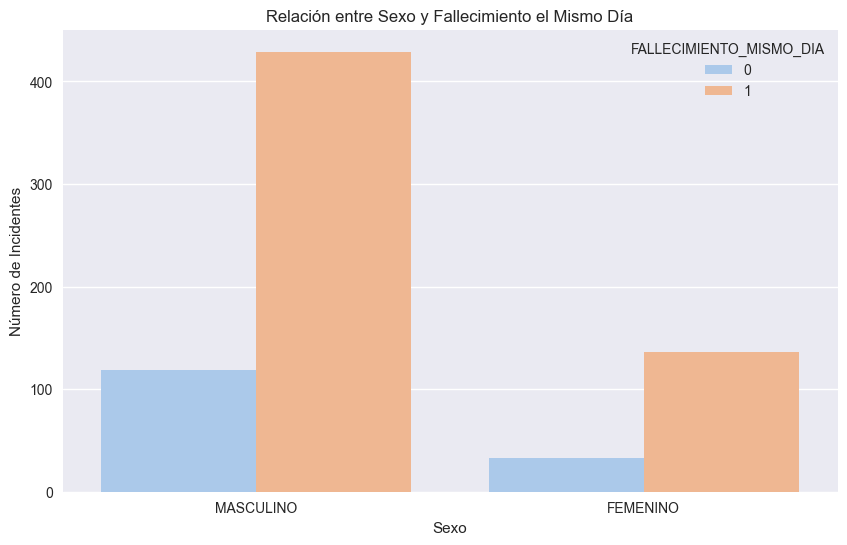

In [99]:
plt.figure(figsize=(10, 6))
sns.countplot(x='SEXO', hue='FALLECIMIENTO_MISMO_DIA', data=homicidios, palette='pastel')
plt.title('Relación entre Sexo y Fallecimiento el Mismo Día')
plt.xlabel('Sexo')
plt.ylabel('Número de Incidentes')
plt.show()


El 80.47% de las mujeres muere el mismo dia del accidente, mientras que los hombres el 78,28% cumple esa misma condición.

In [100]:
homicidios['FECHA'] = pd.to_datetime(homicidios['FECHA'])
homicidios['FECHA_FALLECIMIENTO'] = pd.to_datetime(homicidios['FECHA_FALLECIMIENTO'])

# Crea la columna FALLECIMIENTO_MISMO_DIA
homicidios['FALLECIMIENTO_MISMO_DIA'] = (homicidios['FECHA_FALLECIMIENTO'].dt.date == homicidios['FECHA'].dt.date).astype(int)

# Calcula el porcentaje por género
porcentaje_por_genero = (homicidios.groupby('SEXO')['FALLECIMIENTO_MISMO_DIA'].sum() / homicidios['SEXO'].value_counts() * 100).round(2)

# Muestra el resultado
print(porcentaje_por_genero)

SEXO
FEMENINO     80.47
MASCULINO    78.28
dtype: float64


En este gráfico decidimos mostrar la relación entre el rol y el fallecimiento el mismo día, se puede apreciar que principalpente los conductores mueren en grán medida el mismo día del siniestro.

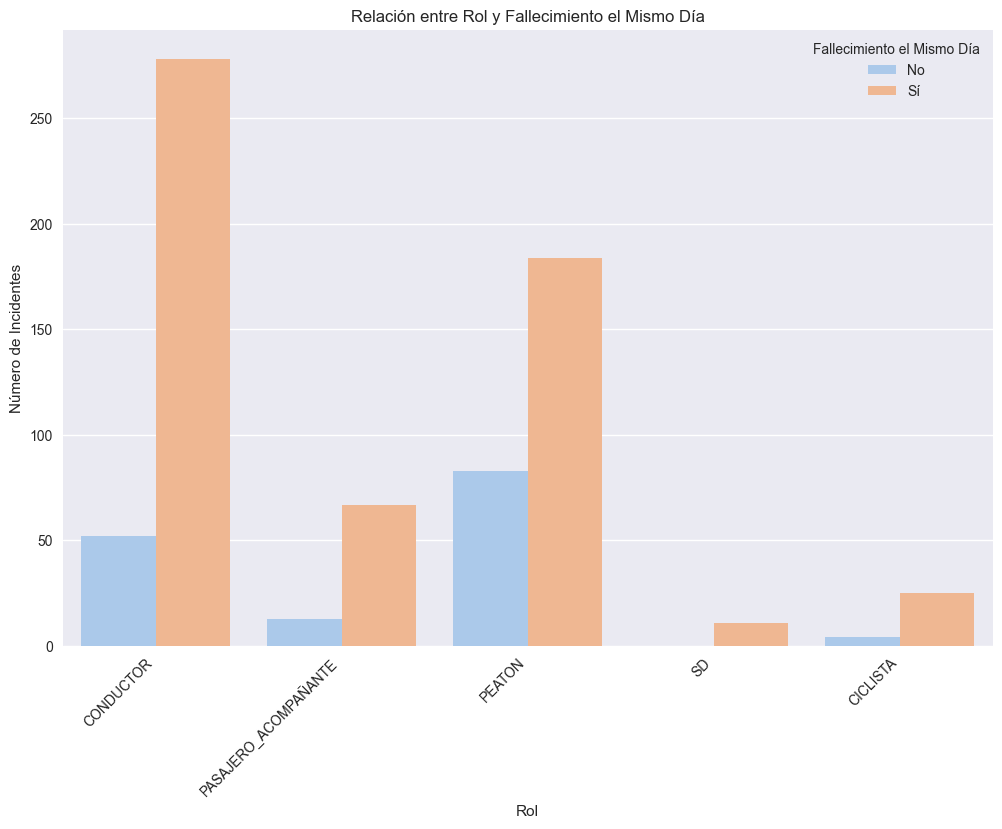

In [101]:
# Crear un gráfico de barras apiladas para la relación entre FALLECIMIENTO_MISMO_DIA y ROL
plt.figure(figsize=(12, 8))
sns.countplot(x='ROL', hue='FALLECIMIENTO_MISMO_DIA', data=homicidios, palette='pastel')
plt.title('Relación entre Rol y Fallecimiento el Mismo Día')
plt.xlabel('Rol')
plt.ylabel('Número de Incidentes')
plt.legend(title='Fallecimiento el Mismo Día', loc='upper right', labels=['No', 'Sí'])
plt.xticks(rotation=45, ha='right')
plt.show()



Conclusión: Análisis de Homicidios en Accidentes de Tránsito en Buenos Aires

A lo largo de este análisis exhaustivo de los homicidios relacionados con accidentes de tránsito en Buenos Aires, hemos identificado patrones significativos y tendencias que ofrecen una visión más clara de la problemática. Algunos hallazgos clave incluyen:

Participantes Predominantes: Los participantes más afectados son peatones y conductores de motocicletas, siendo estos últimos los más propensos a sufrir consecuencias mortales en accidentes de tránsito.

Ubicaciones Críticas: Se han identificado áreas críticas con una mayor incidencia de homicidios, destacando cruces de avenidas y ciertas comunas, especialmente la Comuna 1.

Incidencia por Género: La mayoría de las víctimas son hombres, y se observa una distribución de roles diferente entre los géneros, donde los hombres son principalmente conductores y las mujeres son más propensas a ser peatones.

Tiempo de Respuesta: La mayoría de las víctimas fallecen el mismo día del accidente, destacando la rapidez de las consecuencias mortales en estos incidentes.

Recomendaciones para Futuras Investigaciones: Se sugiere incluir más detalles sobre la causa del siniestro y explorar regulaciones específicas para mejorar la seguridad en áreas críticas.

Este análisis proporciona información valiosa para las autoridades locales, permitiéndoles tomar medidas preventivas y desarrollar estrategias efectivas para reducir la incidencia de homicidios en accidentes de tránsito. La combinación de datos numéricos, gráficos visuales y análisis detallados ofrece una comprensión completa de la situación, allanando el camino para futuras investigaciones y acciones proactivas.

Exportaremos el dataframe homicidios en un formato csv para su analisis en power bi

In [102]:
homicidios.to_csv('dataset.csv', index=False)

KPI

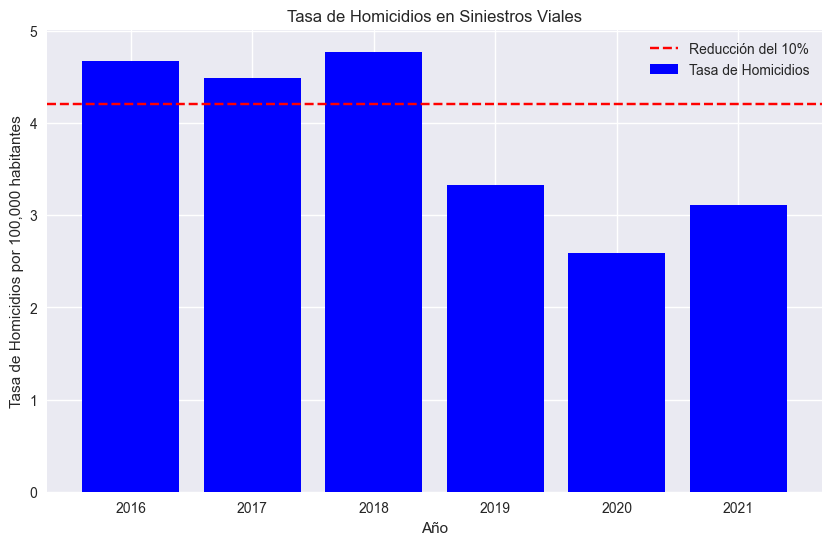

In [114]:
# Población del año 2022
poblacion_2022 = 3120612

# Agrupar por año y calcular tasas de homicidios
tasa_homicidios = (homicidios.groupby('AAAA')['FECHA'].count() / poblacion_2022 * 100000).reset_index()

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(tasa_homicidios['AAAA'], tasa_homicidios['FECHA'], color='blue', label='Tasa de Homicidios')
plt.axhline(y=tasa_homicidios['FECHA'].iloc[0] * 0.9, color='red', linestyle='--', label='Reducción del 10%')
plt.title('Tasa de Homicidios en Siniestros Viales')
plt.xlabel('Año')
plt.ylabel('Tasa de Homicidios por 100,000 habitantes')
plt.legend()
plt.show()

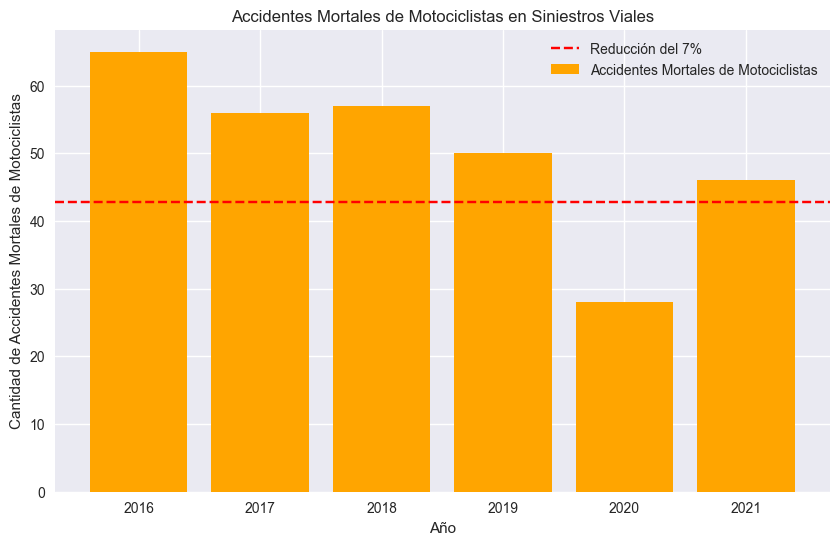

In [115]:
# Filtrar los accidentes de motociclistas
accidentes_motociclistas = homicidios[homicidios['VICTIMA'] == 'MOTO']

# Agrupar por año y contar la cantidad de accidentes de motociclistas
accidentes_motociclistas_por_año = accidentes_motociclistas.groupby('AAAA')['FECHA'].count().reset_index()


reduccion_7 = accidentes_motociclistas_por_año['FECHA'].iloc[-1] * 0.07


plt.figure(figsize=(10, 6))
plt.bar(accidentes_motociclistas_por_año['AAAA'], accidentes_motociclistas_por_año['FECHA'], color='orange', label='Accidentes Mortales de Motociclistas')
plt.axhline(y=accidentes_motociclistas_por_año['FECHA'].iloc[-1] - reduccion_7, color='red', linestyle='--', label='Reducción del 7%')
plt.title('Accidentes Mortales de Motociclistas en Siniestros Viales')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes Mortales de Motociclistas')
plt.legend()
plt.show()
